In [326]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import seaborn as sns
import math

# Dati dei siti

I dati importati hanno tutti lo stesso formato a 4 colonne, (`Ossa`, `Animale`, `NR`, `Mau`)

## Dati sito 1

In [327]:
# unit I
data_ib = pd.read_csv('./risultati_ib.csv')
data_ic = pd.read_csv('./risultati_ic.csv')
data_it = pd.read_csv('./risultati_it.csv')
# unit H
data_h = pd.read_csv('./risultati_h.csv')
# unit G and F
data_g = pd.read_csv('./risultati_g.csv')
data_f = pd.read_csv('./risultati_f.csv')
# unit E
data_e = pd.read_csv('./risultati_e.csv')

## Dati sito 2

In [328]:
data_40 = pd.read_csv('./risultati_40.csv')
data_41 = pd.read_csv('./risultati_41.csv')
data_42 = pd.read_csv('./risultati_42.csv')

In [329]:
data_ib.head()

Ossa         Animale  NR  MAU
0  Palco/Corno  Ursus spelaeus   0    0
1   Mascellare  Ursus spelaeus   0    0
2    Mandibola  Ursus spelaeus   0    0
3   Dente sup.  Ursus spelaeus   0    0
4    Dente inf  Ursus spelaeus   0    0

## Assegnazione colore ad ogni animale

In [330]:
# Conto il numero di animali unici in tutti i datasets
# Avremo bisogno dello stesso numero di colori
animali_ib = data_ib['Animale'].unique()
animali_ic = data_ic['Animale'].unique()
animali_it = data_it['Animale'].unique()
animali_h = data_h['Animale'].unique()
animali_g = data_g['Animale'].unique()
animali_f = data_f['Animale'].unique()
animali_e = data_e['Animale'].unique()
animali_40 = data_40['Animale'].unique()
animali_41 = data_41['Animale'].unique()
animali_42 = data_42['Animale'].unique()
animali_totale = np.unique(np.concatenate((animali_ib, animali_ic, animali_it,
                                           animali_h, animali_g, animali_f, animali_e,
                                           animali_40, animali_41, animali_42)))

In [331]:
colors_array = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a',
          '#ff7c43', '#ffa600', '#ffd500', '#bcbd22', '#17becf',
          '#da8bc3', '#006d2c', '#1f78b4', '#fbb4b9', '#add8e6',
          "#4c72b0", "#55a868", "#c44e52", "#8172b2", "#1f77b4",
          "#64b5cd", "#8c785d", "#6d9eeb", "#e377c2", "#bcbd22",
          "#17becf", "#9467bd", "#d62728", "#8c564b", "#e377c2",
          "#7f7f7f", "#bcbd22", "#17becf", "#7f7f7f", "#ccb974"]
# Creazione dizionario {"animale":"colore"}
colori = dict(zip(animali_totale, colors_array))
colori

{'Alces/Megaloceros': '#003f5c',
 'Bison priscus': '#2f4b7c',
 'Bos primigenius': '#665191',
 'Bos/Bison sp.': '#a05195',
 'Canis lupus': '#d45087',
 'Capra ibex': '#f95d6a',
 'Capreolus capreolus': '#ff7c43',
 'Cervus elaphus': '#ffa600',
 'Crocuta crocuta': '#ffd500',
 'Dama dama': '#bcbd22',
 'Equus sp.': '#17becf',
 'Erinaceus sp.': '#da8bc3',
 'Lepus sp.': '#006d2c',
 'Marmota marmota': '#1f78b4',
 'Martes foina': '#fbb4b9',
 'Mustela sp.': '#add8e6',
 'Panthera leo': '#4c72b0',
 'Panthera leo sp.': '#55a868',
 'Rhinocerontidae': '#c44e52',
 'Rupicapra rupicapra': '#8172b2',
 'Sus scrofa': '#1f77b4',
 'Ursus arctos': '#64b5cd',
 'Ursus sp.': '#8c785d',
 'Ursus spelaeus': '#6d9eeb',
 'Vulpes vulpes': '#e377c2'}

# Analisi Sito 1: Numero Reperti (NR) per Unità

## Funzioni

In [332]:
def create_stackedbar(data, ax, title):
    animali = data['Animale'].unique()
    bottom_bar = np.zeros(data['Ossa'].unique().size)
    for i, animale in enumerate(animali):
        dati_animale = data[data['Animale'] == animale].set_index('Ossa')
        ax.bar(dati_animale.index, dati_animale['NR'], bottom = bottom_bar, label=animale, color=colori[animale])
        bottom_bar = bottom_bar + dati_animale['NR']
    ax.legend()
    ax.set_ylabel("Numero reperti (NR) {}".format(title.upper()))
    # fix ticker locator warning by setting major locator in xaxis
    ticks_loc = list(ax.get_xticks())
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(data['Ossa'].unique(), rotation=90)

## Unità I

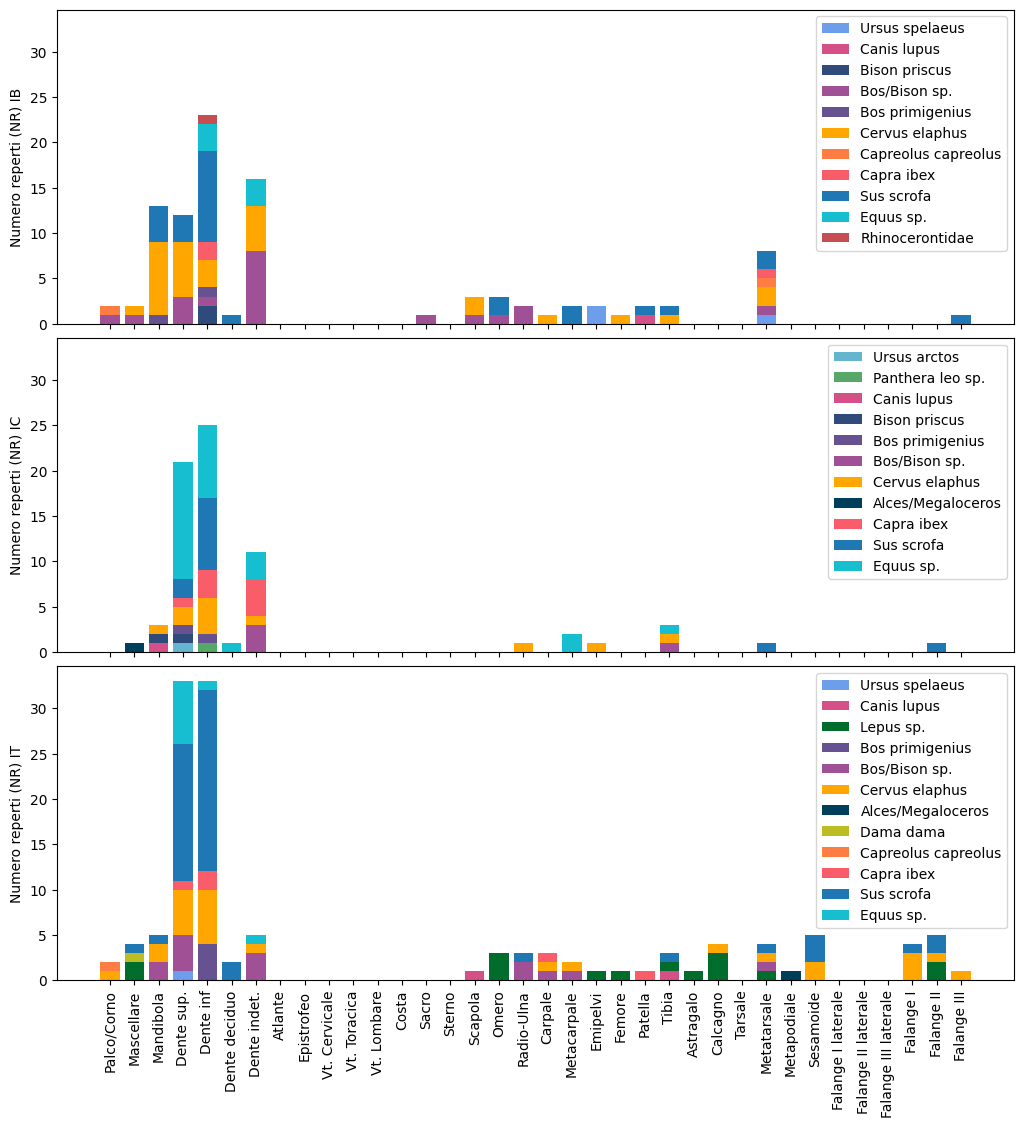

In [333]:
#Inizializza figura
fig, ax = plt.subplots(3, 1, sharey=True, sharex=True)
fig.set_figwidth(10)
fig.set_figheight(10)
fig.tight_layout(pad=0)

create_stackedbar(data_ib, ax[0], 'Ib')
create_stackedbar(data_ic, ax[1], 'Ic')
create_stackedbar(data_it, ax[2], 'It')

plt.savefig("unita_i.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Unità H

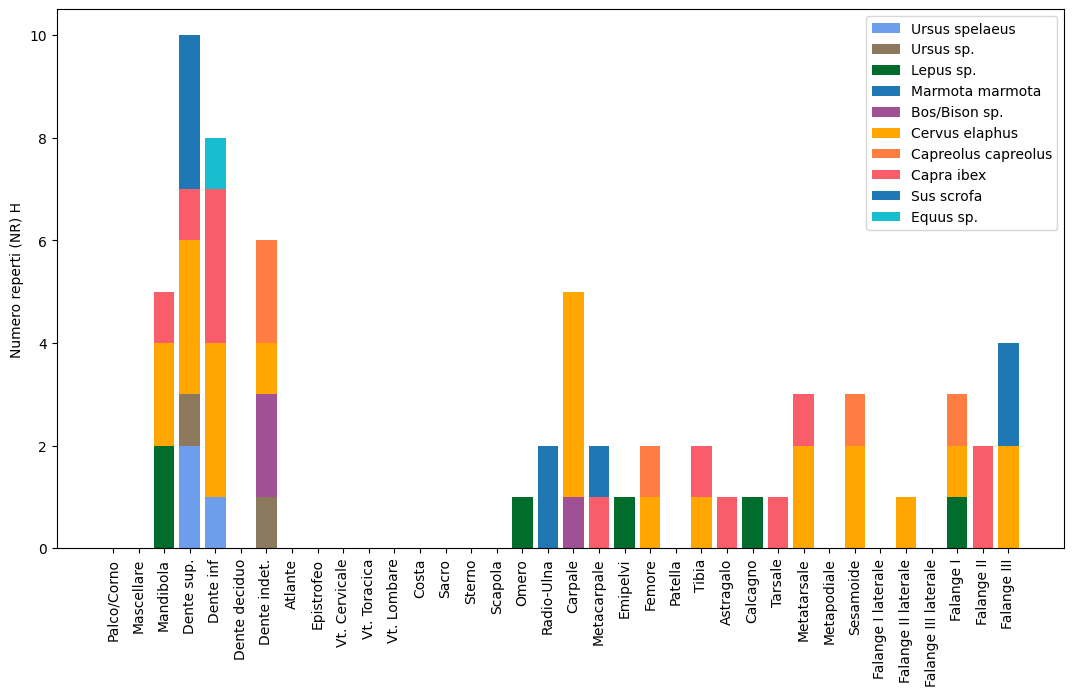

In [334]:
fig1, ax1 = plt.subplots()
fig1.set_figwidth(13)
fig1.set_figheight(7)
ax1.set_ylim([0,10.5])

create_stackedbar(data_h, ax1, 'H')

plt.savefig("unita_h.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Unità G e F

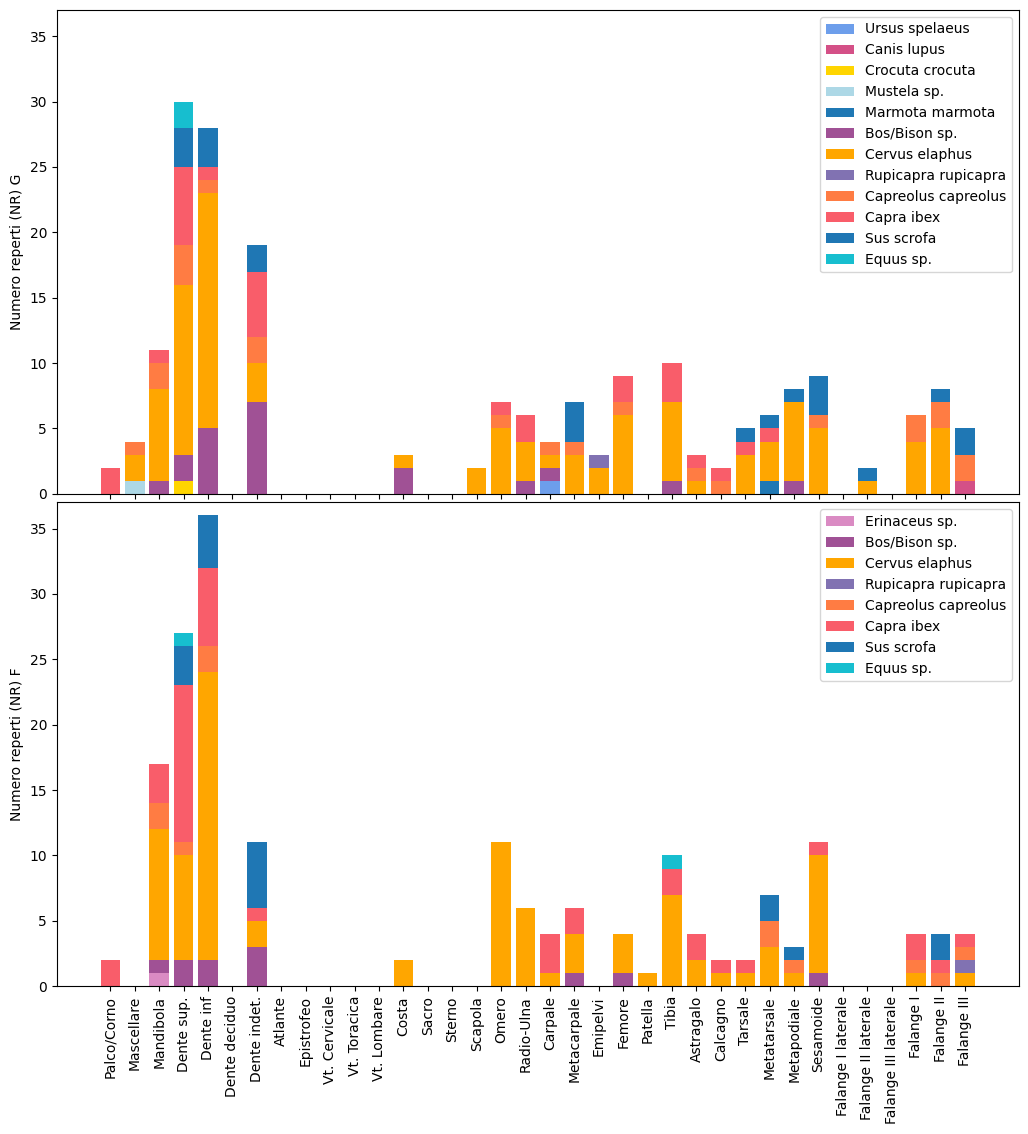

In [335]:
fig2, ax2 = plt.subplots(2, 1, sharey=True, sharex=True)
fig2.set_figwidth(10)
fig2.set_figheight(10)
ax2[0].set_ylim([0,37])
fig2.tight_layout(pad=0)

create_stackedbar(data_g, ax2[0], 'G')
create_stackedbar(data_f, ax2[1], 'F')

plt.savefig("unita_g_f.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Unità E

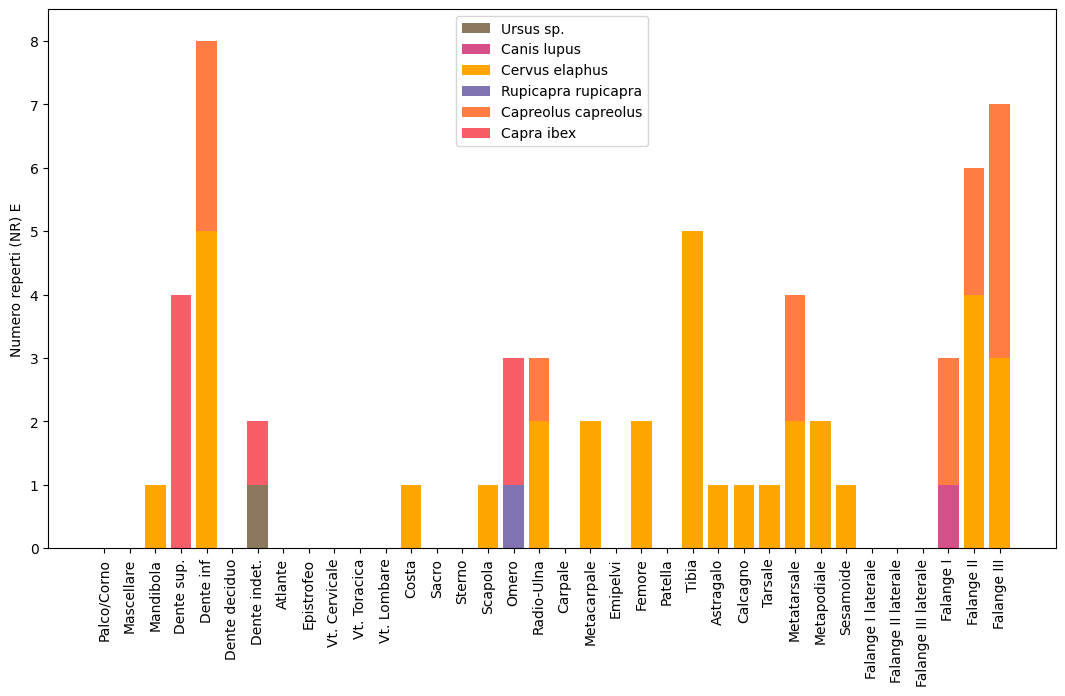

In [336]:
fig3, ax3 = plt.subplots()
fig3.set_figwidth(13)
fig3.set_figheight(7)
ax3.set_ylim([0,8.5])

create_stackedbar(data_e, ax3, 'E')

plt.savefig("unita_e.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Analisi sito 1: MAU%

## Funzioni

In [389]:
def create_mau_lineplot(data, ax, title, position):
    animali = data['Animale'].unique()
    for i, animale in enumerate(animali):
        dati_animale = data[data['Animale'] == animale].set_index('Ossa')
        ax.plot(dati_animale.index, dati_animale['MAU'], label=animale, color=colori[animale])
    ax.legend(loc=position)
    ax.set_ylabel("MAU% Unità {}".format(title.upper()))
    # fix ticker locator warning by setting major locator to xaxis
    ticks_loc = list(ax.get_xticks())
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(dati_animale.index.unique(), rotation=90)

In [338]:
data_ib.set_index('Ossa').head()

Animale  NR  MAU
Ossa                                
Palco/Corno  Ursus spelaeus   0    0
Mascellare   Ursus spelaeus   0    0
Mandibola    Ursus spelaeus   0    0
Dente sup.   Ursus spelaeus   0    0
Dente inf    Ursus spelaeus   0    0

## Manipolazione dati: Esclusione ossa senza MAU
Per il calcolo del MAU bisogna escludere dai dataset tutte le righe dove la il valore della colonna `'Ossa'` è uguale a uno dei seguenti elementi:

In [339]:
ossa_no_mau = np.array(['Dente sup.','Dente inf','Dente deciduo','Dente indet.', 'Metapodiale', 'Sesamoide',
              'Falange I laterale', 'Falange II laterale', 'Falange III laterale'])

In [340]:
def filtra_ossa_mau(df):
    condizione = [ossa not in ossa_no_mau for ossa in df['Ossa']]
    return df[condizione]

In [341]:
# DataFrame filtrati
data_ib_mau = filtra_ossa_mau(data_ib)
data_ic_mau = filtra_ossa_mau(data_ic)
data_it_mau = filtra_ossa_mau(data_it)
data_h_mau = filtra_ossa_mau(data_h)
data_g_mau = filtra_ossa_mau(data_g)
data_f_mau = filtra_ossa_mau(data_f)
data_e_mau = filtra_ossa_mau(data_e)

## Unità I

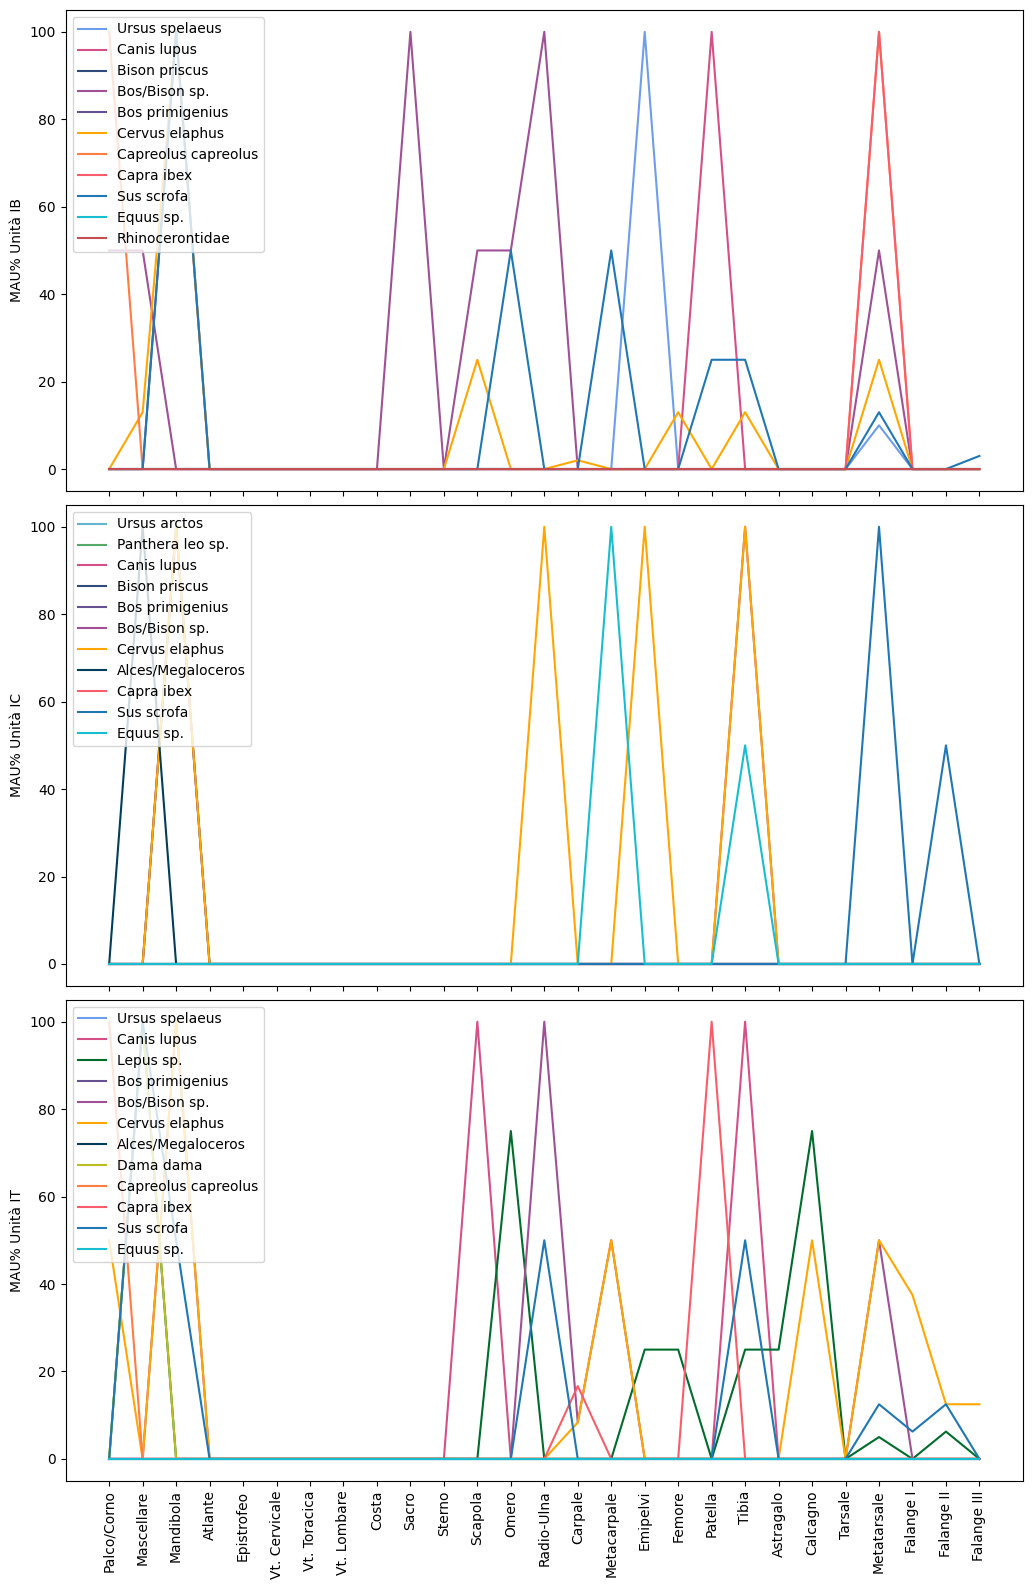

In [394]:
#Inizializza figura
fig, ax = plt.subplots(3, 1, sharey=True, sharex=True)
fig.set_figwidth(10)
fig.set_figheight(15)
fig.tight_layout(pad=0)

create_mau_lineplot(data_ib_mau, ax[0], 'Ib', "upper left")
create_mau_lineplot(data_ic_mau, ax[1], 'Ic', "upper left")
create_mau_lineplot(data_it_mau, ax[2], 'It', "upper left")

plt.savefig("unita_i_mau.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Analisi per animale

#### Funzioni

In [343]:
def drop_animali_no_mau(data):
    dati_copia = data.copy()
    animali = dati_copia['Animale'].unique()
    print(f'Prima del drop: {animali.size}')
    for animale in animali:
        mau_animale = dati_copia[dati_copia['Animale'] == animale]['MAU']
        if mau_animale.sum() == 0:
            dati_copia.drop(dati_copia.loc[dati_copia['Animale'] == animale].index, inplace=True)
    return dati_copia

In [344]:
def plot_all_animals(data, col_num, unit, filename):
    num_animali = data['Animale'].unique()
    row_num=math.ceil(len(num_animali)/col_num)
    fig, ax = plt.subplots(row_num, col_num, sharey=True, sharex=True)
    fig.set_figwidth(10)
    fig.set_figheight(10)
    fig.tight_layout(pad=0)
    if row_num == 1: 
        ax=[ax]
    for idx, animale in enumerate(num_animali):
        dati_animale = data[data['Animale'] == animale].set_index('Ossa')
        # Nice trick with matrices
        row_idx=idx//col_num
        col_idx=idx%col_num
        # Plot and set labels
        ax[row_idx][col_idx].plot(dati_animale.index, dati_animale['MAU'], label=animale, color=colori[animale])
        ticks_loc = list(ax[row_idx][col_idx].get_xticks())
        ax[row_idx][col_idx].xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
        ax[row_idx][col_idx].set_xticklabels(dati_animale.index.unique(), rotation=90)
        # Removes the legend line
        ax[row_idx][col_idx].legend(handlelength=0, handletextpad=0, fancybox=True)
        # Removes the graph if it doesn't contain data
    
    for i in range(col_num):
        if(not ax[row_num-1][i].has_data()):
            fig.delaxes(ax[row_num-1][i])
        
    fig.suptitle(f'MAU% Unità {unit}')
    plt.subplots_adjust(top=0.95)
    plt.savefig(filename +".pdf", format="pdf", bbox_inches="tight")
    plt.show()

#### Unità Ib

In [345]:
data_ib_mau_not_null = drop_animali_no_mau(data_ib_mau)
new_animali_tot = new['Animale'].unique().size
print(f'Dopo il drop: {new_animali_tot}')

Prima del drop: 11
Dopo il drop: 8


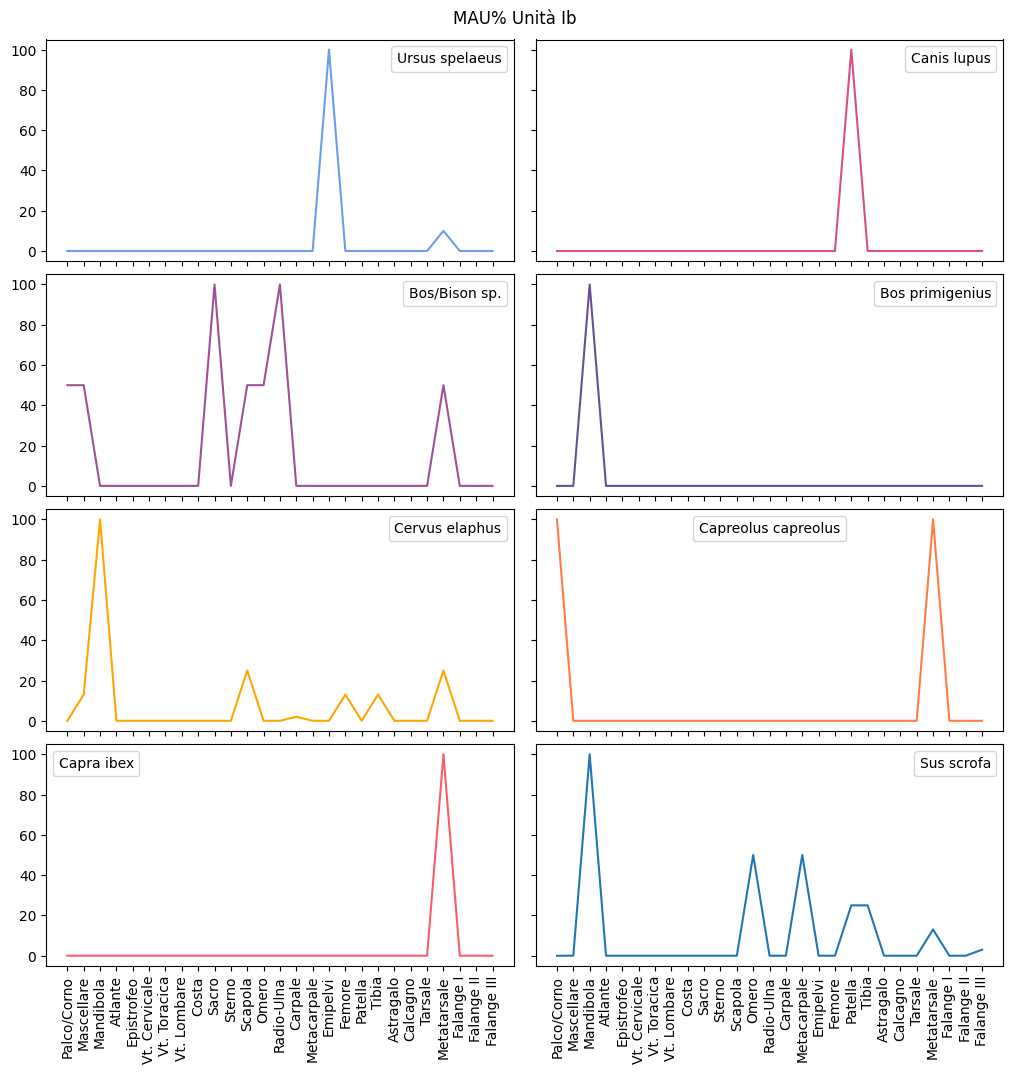

In [346]:
plot_all_animals(data_ib_mau_notnull, 2, "Ib", "unita_ib_animali")

##### Cervo e Sus Scrofa

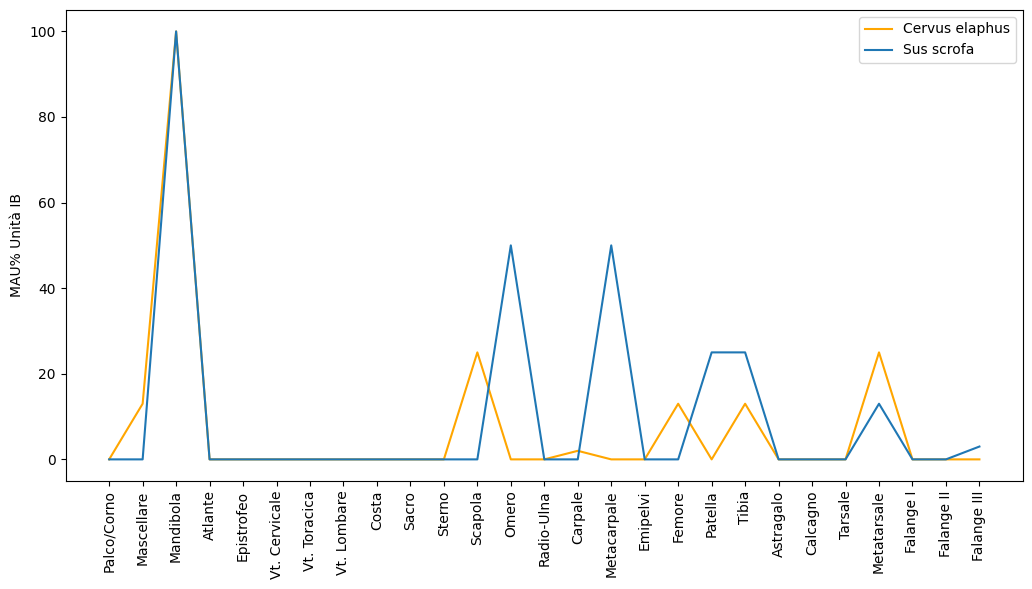

In [347]:
#Inizializza figura
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
fig.tight_layout(pad=0)

create_mau_lineplot(data_ib_mau_not_null[data_ib_mau_not_null['Animale'] == 'Cervus elaphus'], ax, 'Ib')
create_mau_lineplot(data_ib_mau_not_null[data_ib_mau_not_null['Animale'] == 'Sus scrofa'], ax, 'Ib')

plt.savefig("unita_ib_mau_cervus_sus.pdf", format="pdf", bbox_inches="tight")
plt.show()

#### Unità Ic

In [348]:
data_ic_mau_not_null = drop_animali_no_mau(data_ic_mau)
data_ic_mau_not_null['Animale'].unique().size

Prima del drop: 11


7

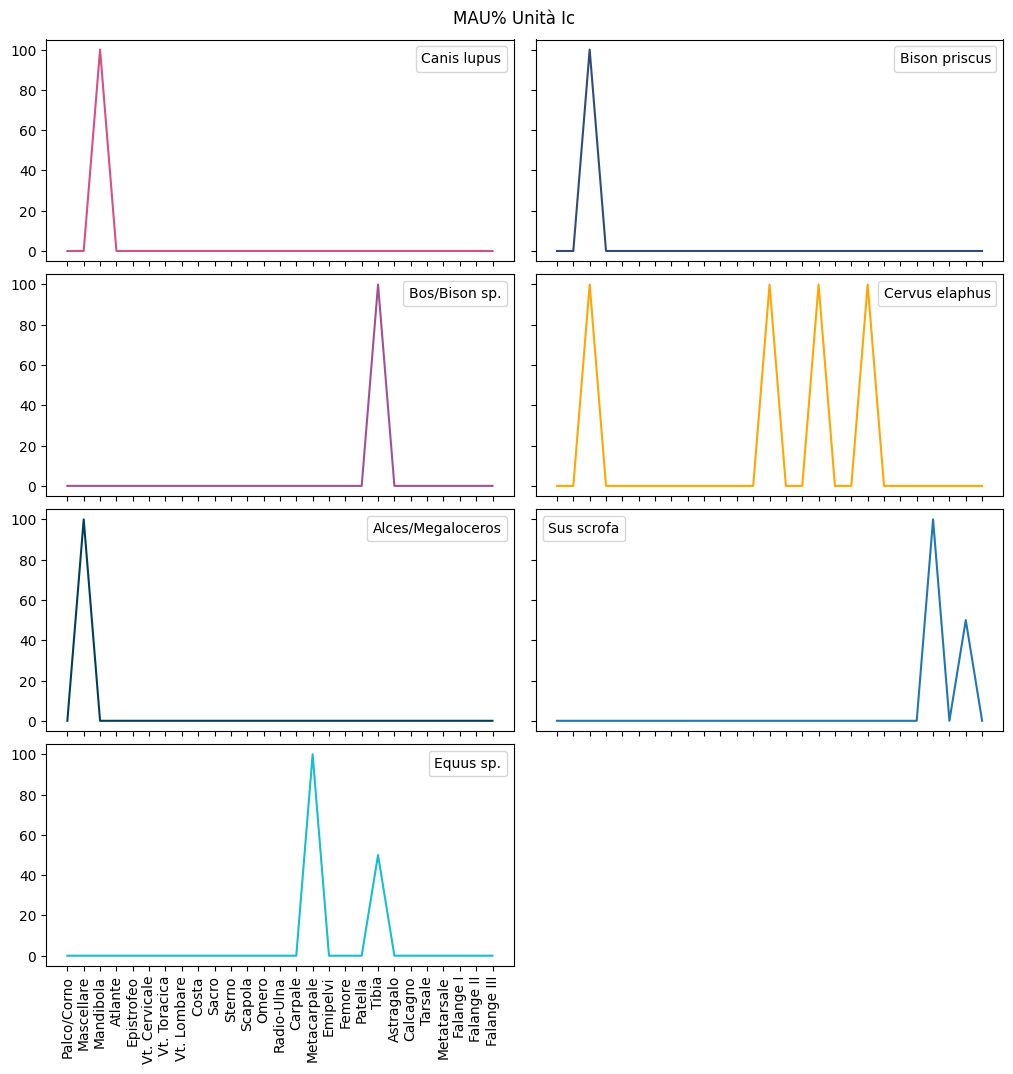

In [349]:
plot_all_animals(data_ic_mau_not_null, 2, "Ic", "unita_ic_animali")

##### Cervo e Sus Scrofa

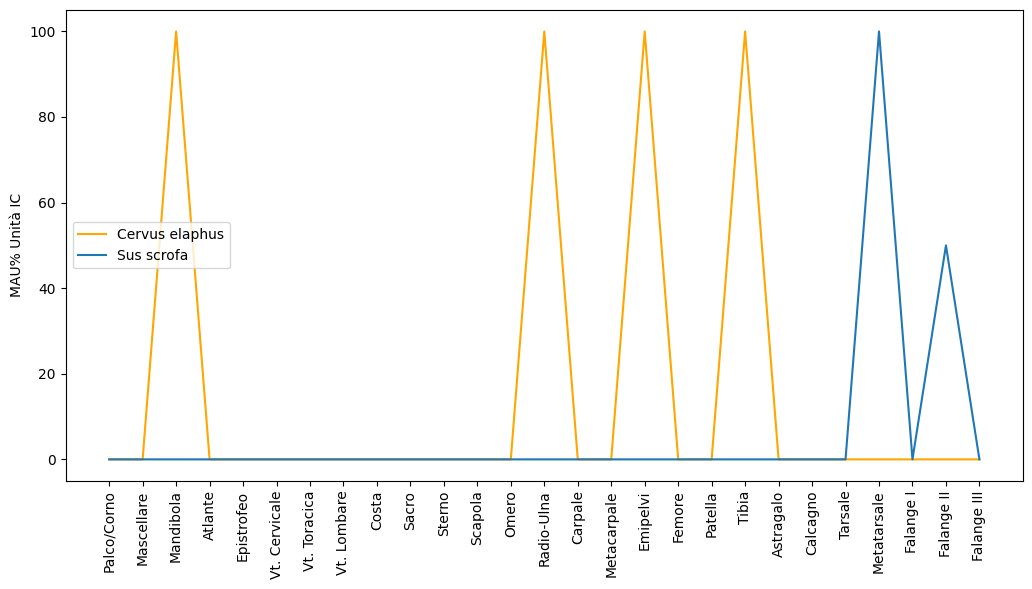

In [350]:
#Inizializza figura
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
fig.tight_layout(pad=0)

create_mau_lineplot(data_ic_mau_not_null[data_ic_mau_not_null['Animale'] == 'Cervus elaphus'], ax, 'Ic')
create_mau_lineplot(data_ic_mau_not_null[data_ic_mau_not_null['Animale'] == 'Sus scrofa'], ax, 'Ic')

plt.savefig("unita_ic_mau_cervus_sus.pdf", format="pdf", bbox_inches="tight")
plt.show()

#### Unità It

In [351]:
data_it_mau_not_null = drop_animali_no_mau(data_it_mau)
data_it_mau_not_null['Animale'].unique().size

Prima del drop: 12


8

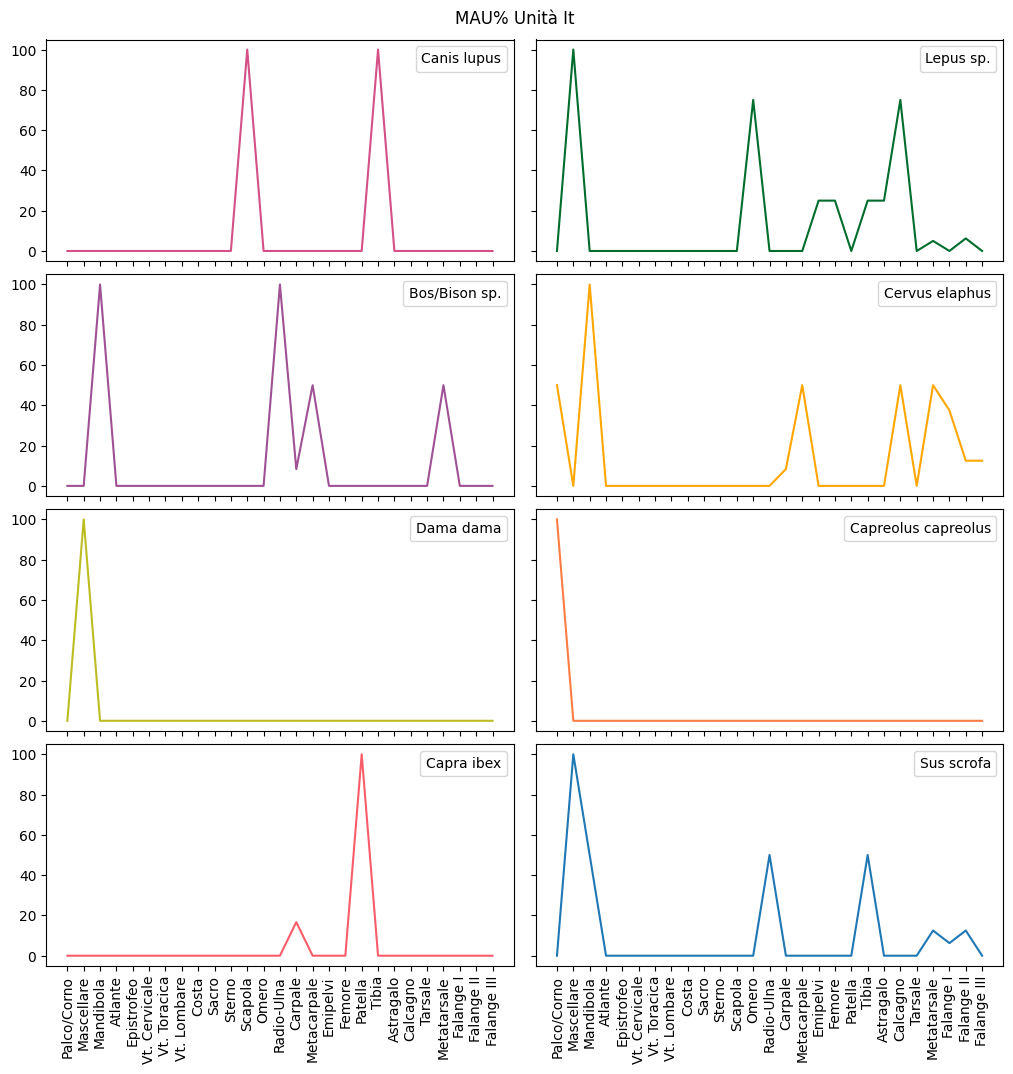

In [352]:
plot_all_animals(data_it_mau_not_null, 2, "It", "unita_it_animali")

##### Cervo e Sus Scrofa

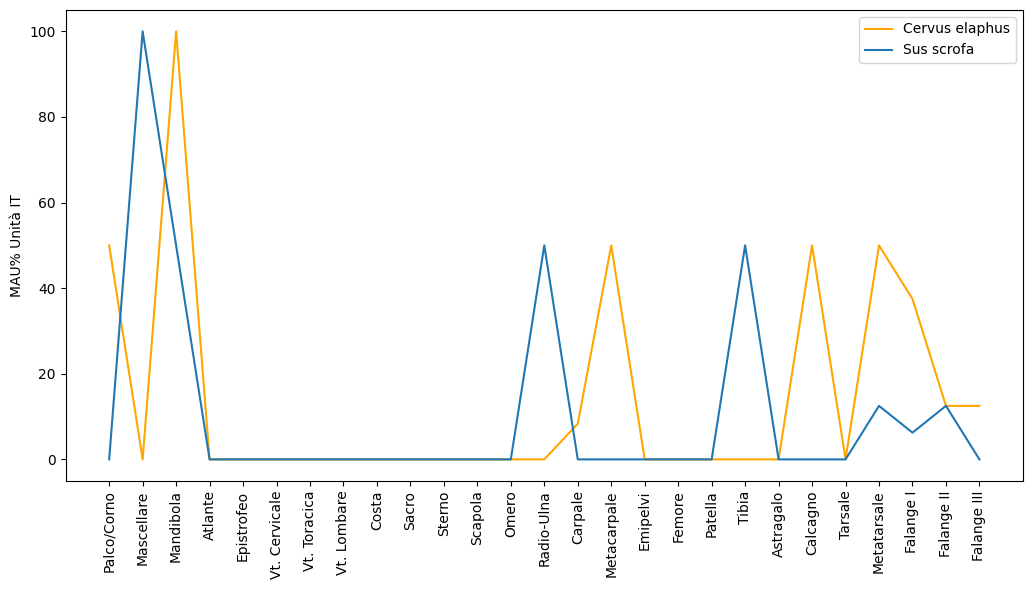

In [353]:
#Inizializza figura
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
fig.tight_layout(pad=0)

create_mau_lineplot(data_it_mau_not_null[data_it_mau_not_null['Animale'] == 'Cervus elaphus'], ax, 'It')
create_mau_lineplot(data_it_mau_not_null[data_it_mau_not_null['Animale'] == 'Sus scrofa'], ax, 'It')

plt.savefig("unita_it_mau_cervus_sus.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Unità H

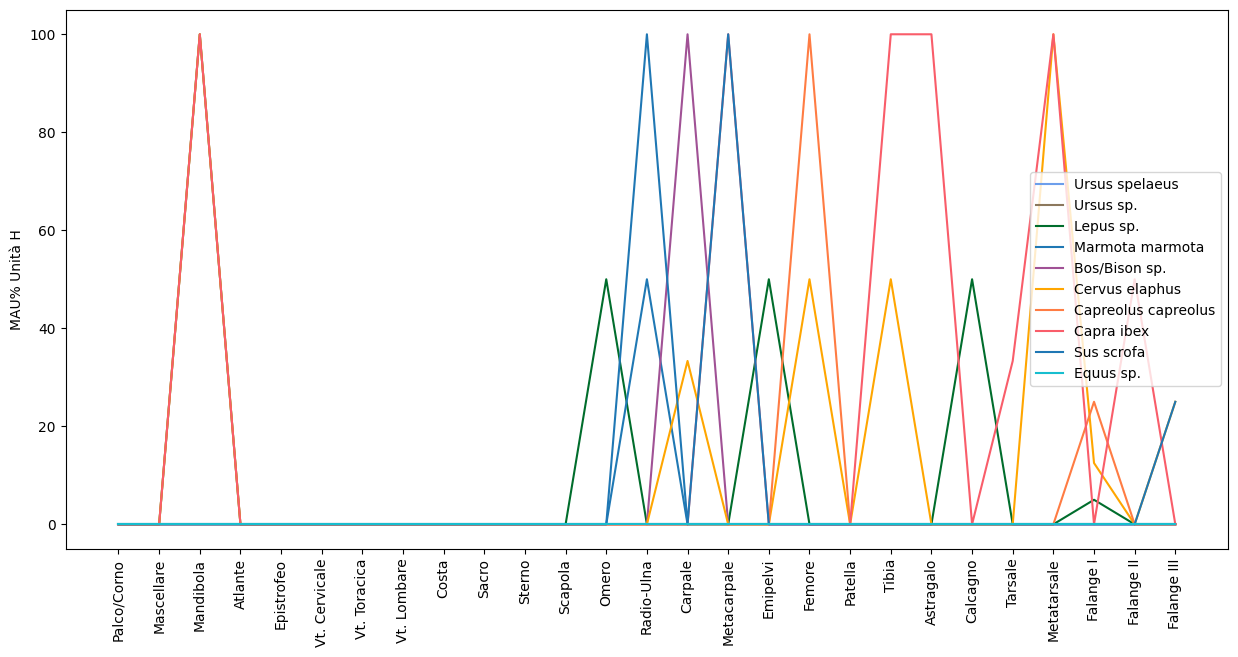

In [354]:
fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(7)

create_mau_lineplot(data_h_mau, ax1, 'H')

plt.savefig("unita_h_mau.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Analisi per animale

In [355]:
data_h_mau_not_null = drop_animali_no_mau(data_h_mau)
data_h_mau_not_null['Animale'].unique().size

Prima del drop: 10


7

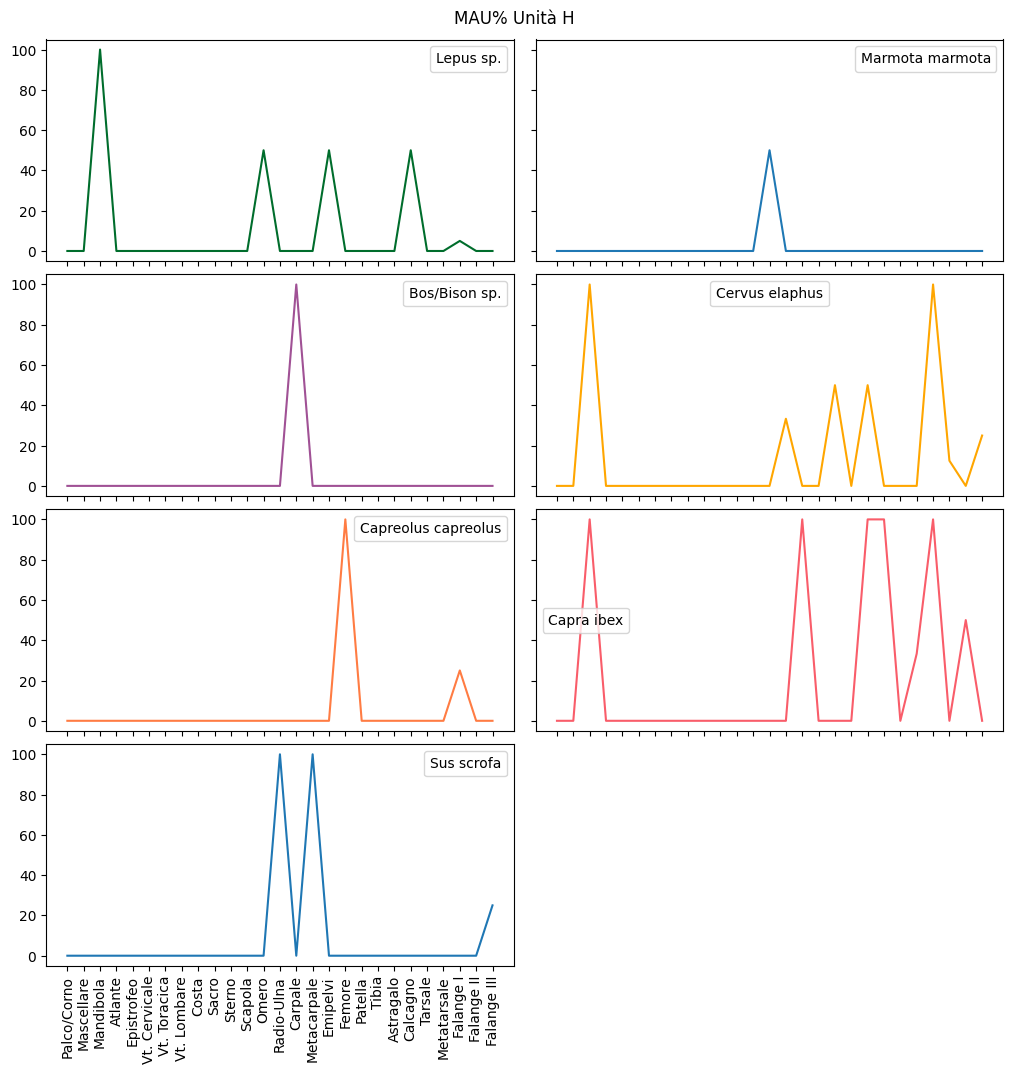

In [356]:
plot_all_animals(data_h_mau_not_null, 2, "H", "unita_h_animali")

##### Cervo e Capra Ibex

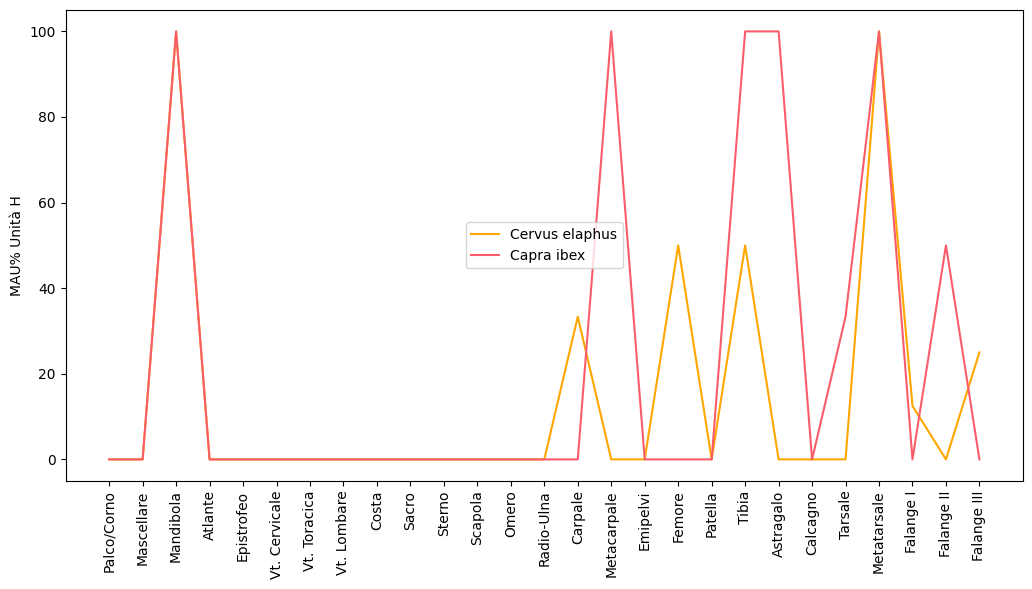

In [357]:
#Inizializza figura
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
fig.tight_layout(pad=0)

create_mau_lineplot(data_h_mau_not_null[data_h_mau_not_null['Animale'] == 'Cervus elaphus'], ax, 'H')
create_mau_lineplot(data_h_mau_not_null[data_h_mau_not_null['Animale'] == 'Capra ibex'], ax, 'H')

plt.savefig("unita_h_mau_cervus_ibex.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Unità G e F

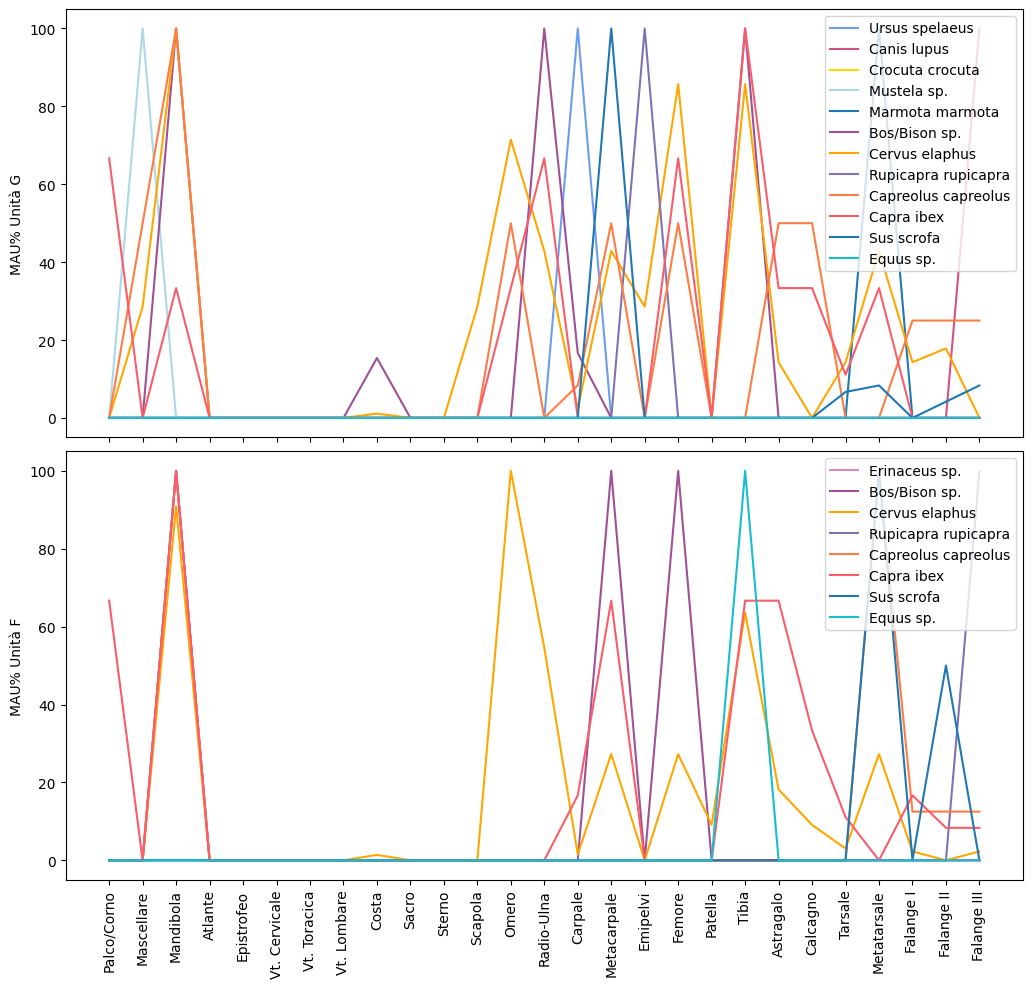

In [387]:
fig2, ax2 = plt.subplots(2, 1, sharey=True, sharex=True)
fig2.set_figwidth(10)
fig2.set_figheight(9)
fig2.tight_layout(pad=0)

create_mau_lineplot(data_g_mau, ax2[0], 'G')
create_mau_lineplot(data_f_mau, ax2[1], 'F')

plt.savefig("unita_g_f_mau.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Analisi per animale

#### Unità G

In [359]:
data_g_mau_not_null = drop_animali_no_mau(data_g_mau)
data_g_mau_not_null['Animale'].unique().size

Prima del drop: 12


10

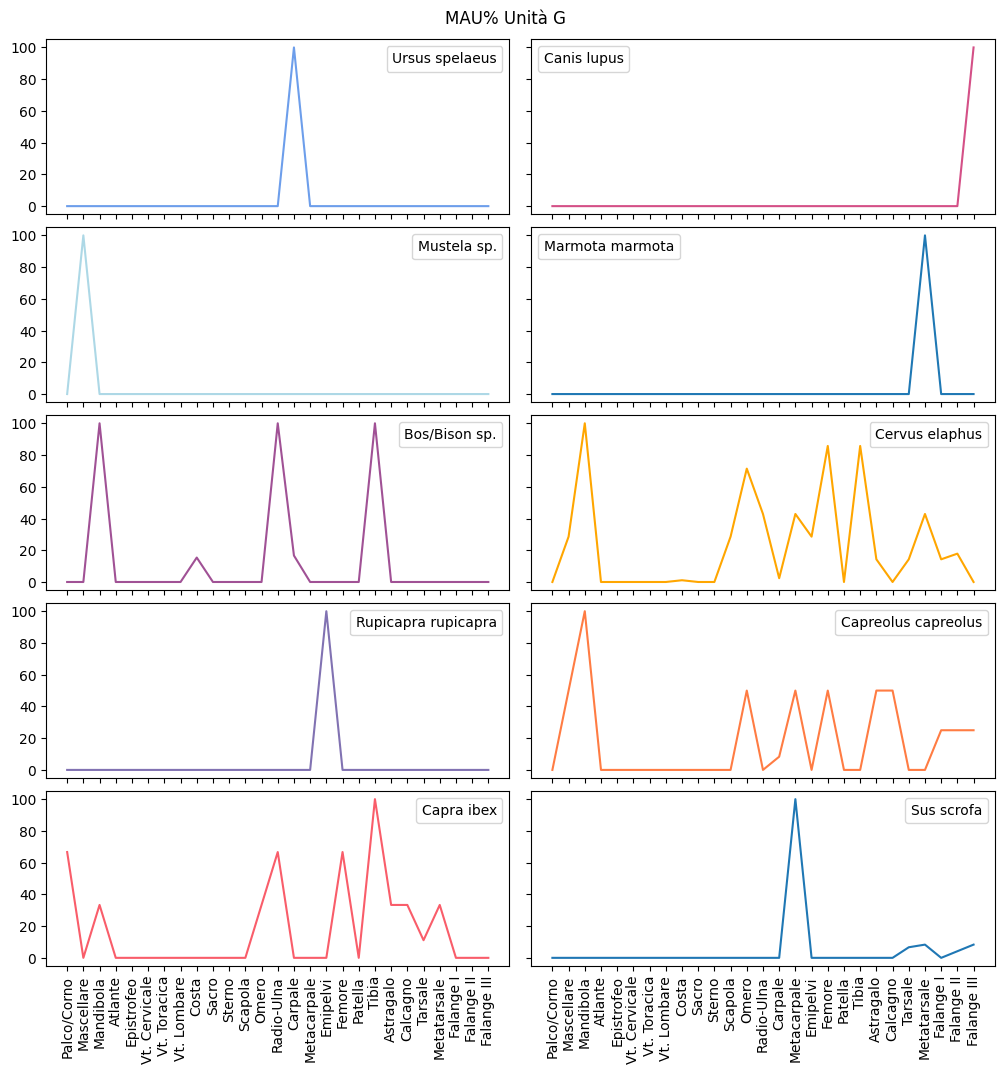

In [360]:
plot_all_animals(data_g_mau_not_null, 2, "G", "unita_g_animali")

##### Cervo, Capra Ibex e Capreolus

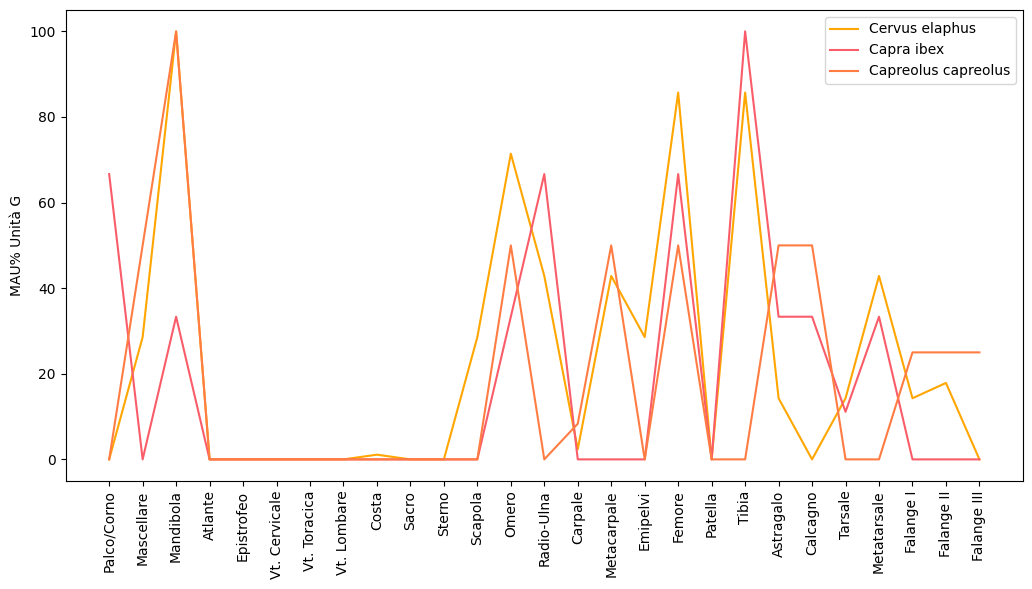

In [361]:
#Inizializza figura
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
fig.tight_layout(pad=0)

create_mau_lineplot(data_g_mau_not_null[data_g_mau_not_null['Animale'] == 'Cervus elaphus'], ax, 'G')
create_mau_lineplot(data_g_mau_not_null[data_g_mau_not_null['Animale'] == 'Capra ibex'], ax, 'G')
create_mau_lineplot(data_g_mau_not_null[data_g_mau_not_null['Animale'] == 'Capreolus capreolus'], ax, 'G')

plt.savefig("unita_g_mau_cervus_ibex_capr.pdf", format="pdf", bbox_inches="tight")
plt.show()

#### Unità F

In [362]:
data_f_mau_not_null = drop_animali_no_mau(data_f_mau)
data_f_mau_not_null['Animale'].unique().size

Prima del drop: 8


8

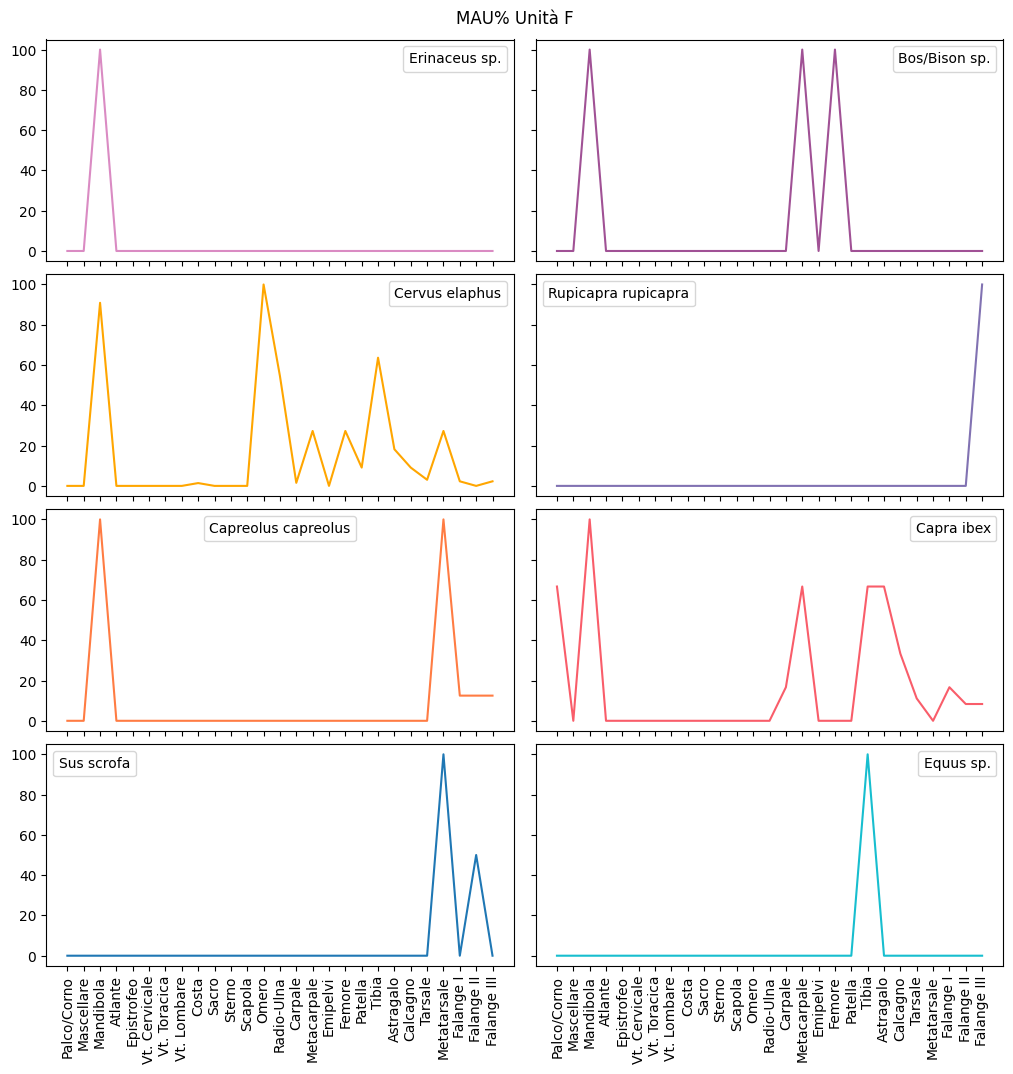

In [363]:
plot_all_animals(data_f_mau_not_null, 2, "F", "unita_f_animali")

##### Cervo, Capra Ibex e Capreolus

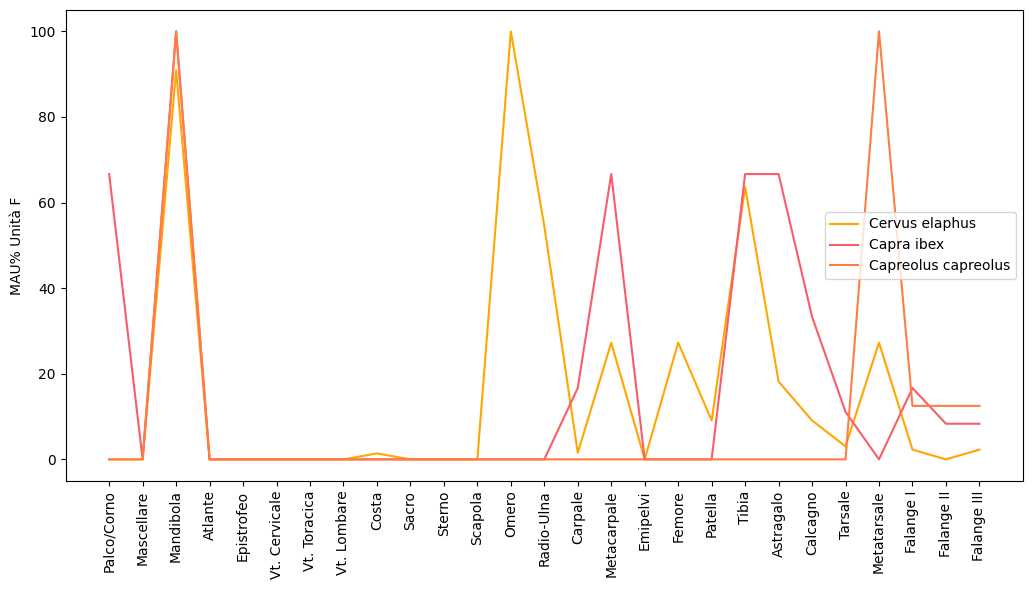

In [364]:
#Inizializza figura
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
fig.tight_layout(pad=0)

create_mau_lineplot(data_f_mau_not_null[data_f_mau_not_null['Animale'] == 'Cervus elaphus'], ax, 'F')
create_mau_lineplot(data_f_mau_not_null[data_f_mau_not_null['Animale'] == 'Capra ibex'], ax, 'F')
create_mau_lineplot(data_f_mau_not_null[data_f_mau_not_null['Animale'] == 'Capreolus capreolus'], ax, 'F')

plt.savefig("unita_f_mau_cervus_ibex_capr.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Unità E

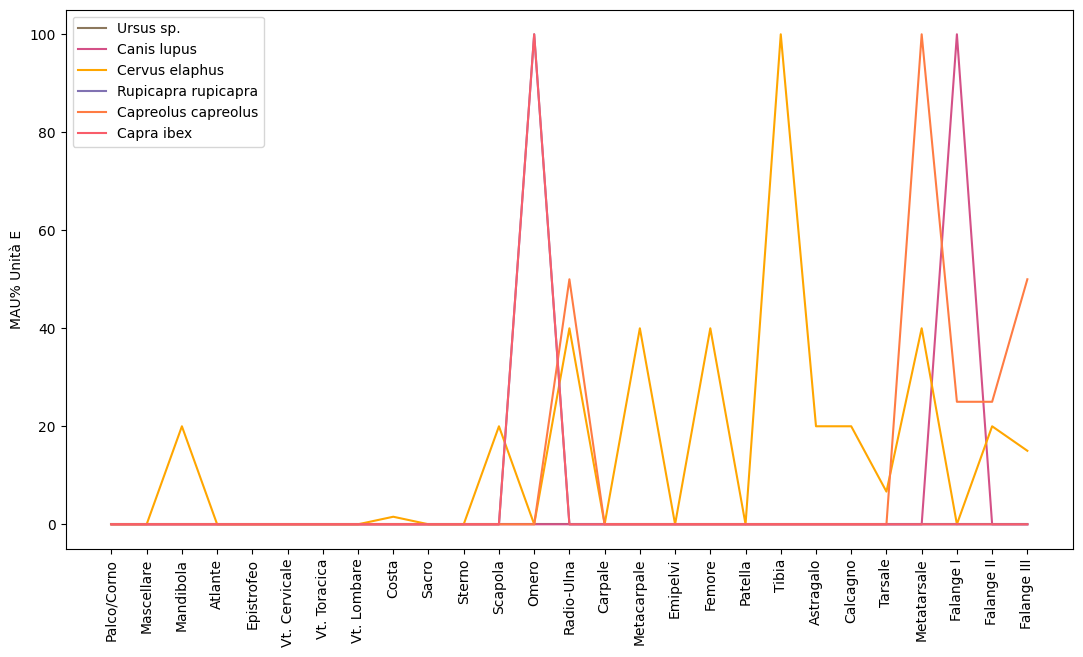

In [365]:
fig3, ax3 = plt.subplots()
fig3.set_figwidth(13)
fig3.set_figheight(7)

create_mau_lineplot(data_e_mau, ax3, 'E')

plt.savefig("unita_e_mau.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Analisi per animale

In [366]:
data_e_mau_not_null = drop_animali_no_mau(data_e_mau)
data_e_mau_not_null['Animale'].unique().size

Prima del drop: 6


5

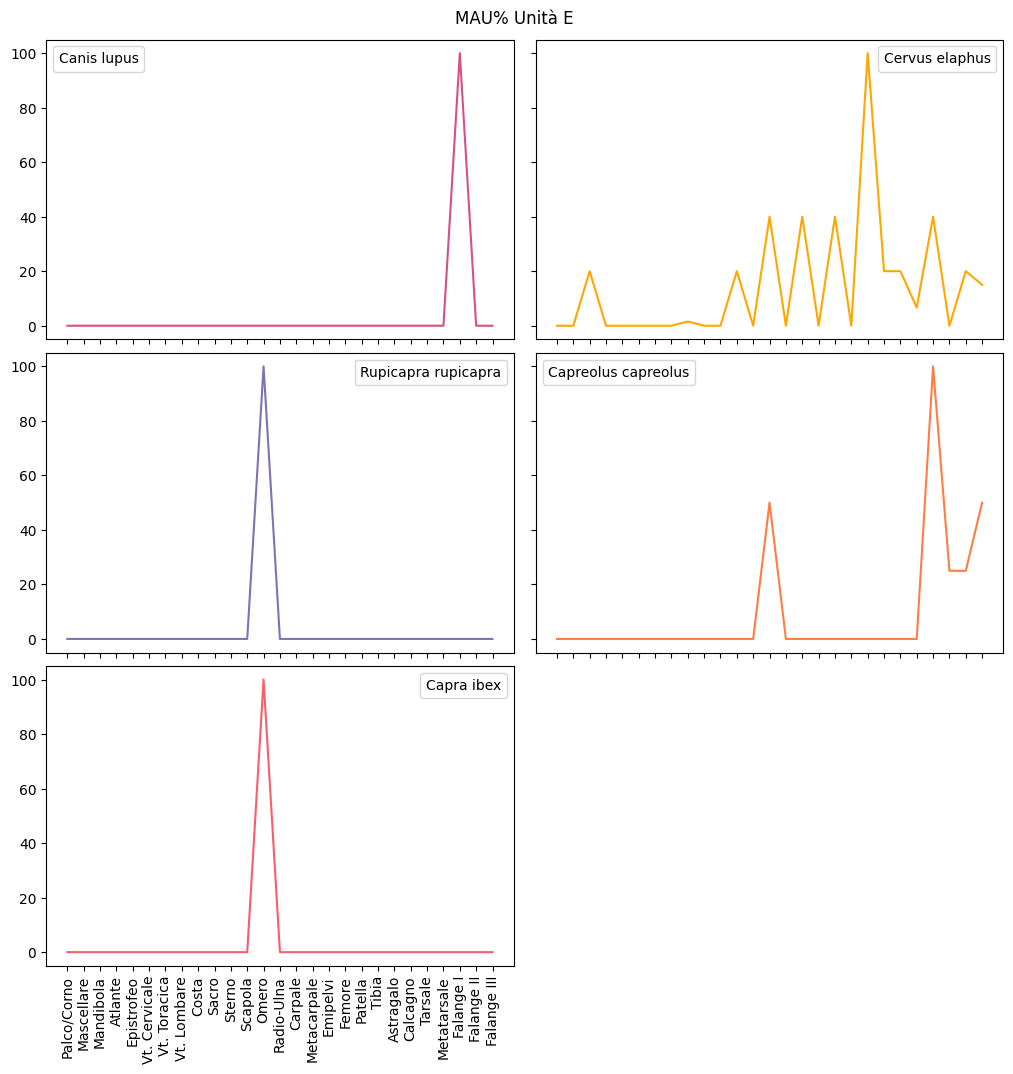

In [367]:
plot_all_animals(data_e_mau_not_null, 2, "E", "unita_e_animali")

##### Cervo e Capreolus

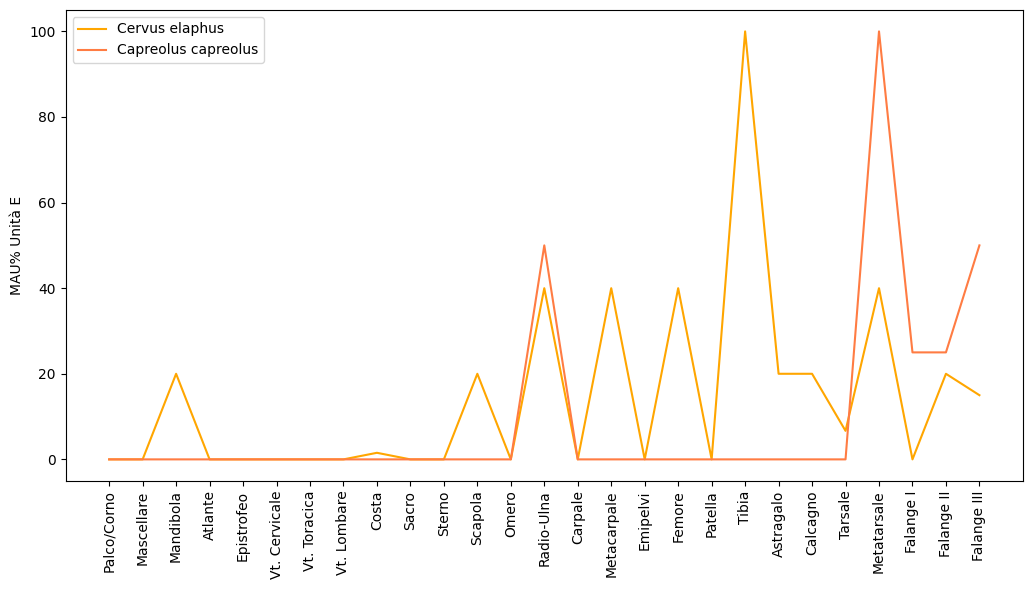

In [368]:
#Inizializza figura
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
fig.tight_layout(pad=0)

create_mau_lineplot(data_e_mau_not_null[data_e_mau_not_null['Animale'] == 'Cervus elaphus'], ax, 'E')
create_mau_lineplot(data_e_mau_not_null[data_e_mau_not_null['Animale'] == 'Capreolus capreolus'], ax, 'E')

plt.savefig("unita_e_mau_cervus_capr.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Analisi Sito 2: Numero reperti (NR) per Unità

## Unità 40

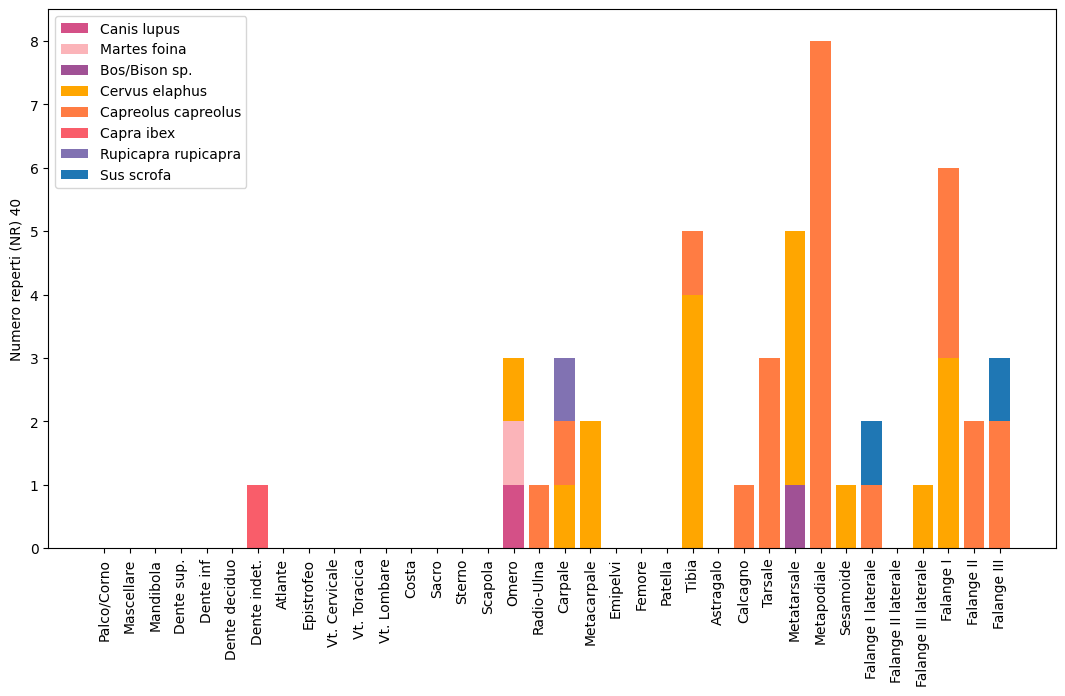

In [369]:
fig, ax = plt.subplots()
fig.set_figwidth(13)
fig.set_figheight(7)
ax.set_ylim([0,8.5])

create_stackedbar(data_40, ax, '40')

plt.savefig("unita_40.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Unità 41

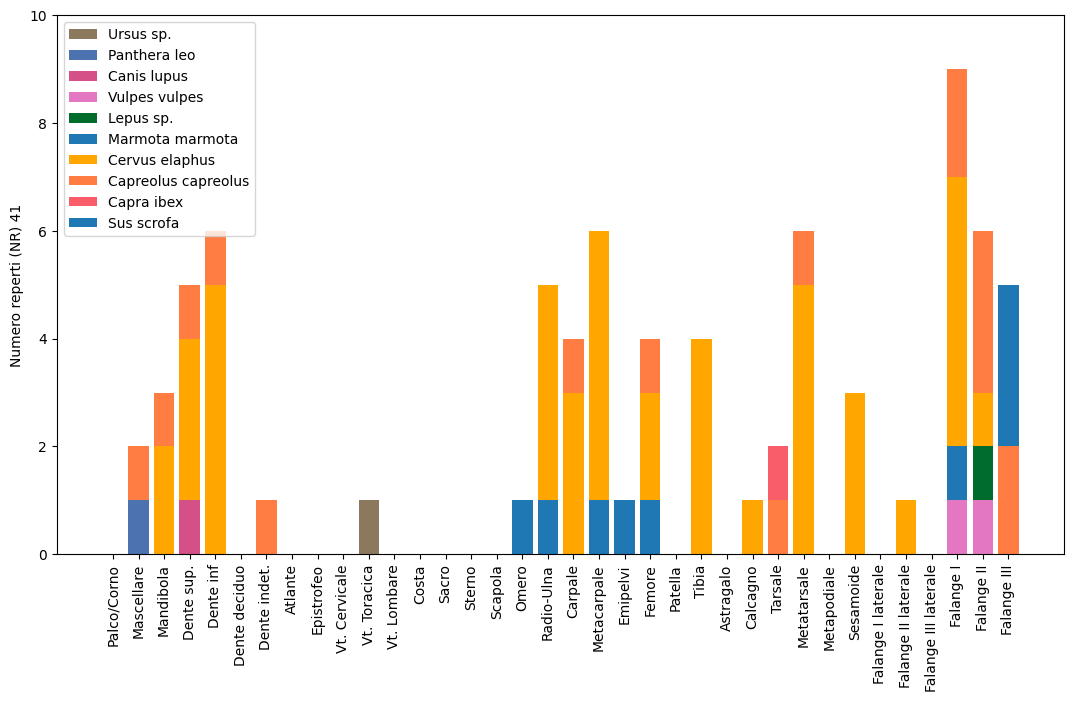

In [370]:
fig, ax = plt.subplots()
fig.set_figwidth(13)
fig.set_figheight(7)
ax.set_ylim([0,10])

create_stackedbar(data_41, ax, '41')

plt.savefig("unita_41.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Unità 42

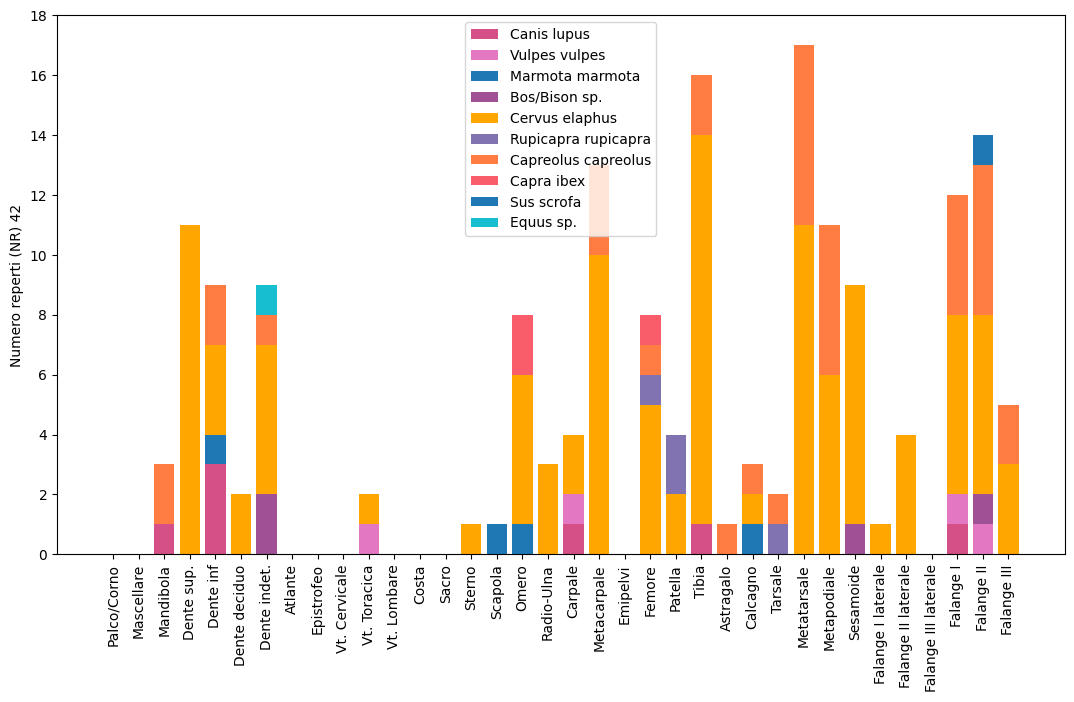

In [371]:
fig, ax = plt.subplots()
fig.set_figwidth(13)
fig.set_figheight(7)
ax.set_ylim([0,18])

create_stackedbar(data_42, ax, '42')

plt.savefig("unita_42.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Analisi Sito 2: MAU%

## Manipolazione dati: Esclusione ossa senza MAU
Per il calcolo del MAU bisogna escludere dai dataset tutte le righe dove la il valore della colonna `'Ossa'` è uguale a uno dei seguenti elementi:

In [372]:
ossa_no_mau_drop = np.array(['Dente sup.','Dente inf','Dente deciduo','Dente indet.', 'Metapodiale', 'Sesamoide',
              'Falange I laterale', 'Falange II laterale', 'Falange III laterale'])

In [373]:
def filtra_ossa_mau(df):
    condizione = [ossa not in ossa_no_mau for ossa in df['Ossa']]
    return df[condizione]

In [374]:
# DataFrame filtrati
data_40_mau = filtra_ossa_mau(data_40)
data_41_mau = filtra_ossa_mau(data_41)
data_42_mau = filtra_ossa_mau(data_42)

## Unità 40

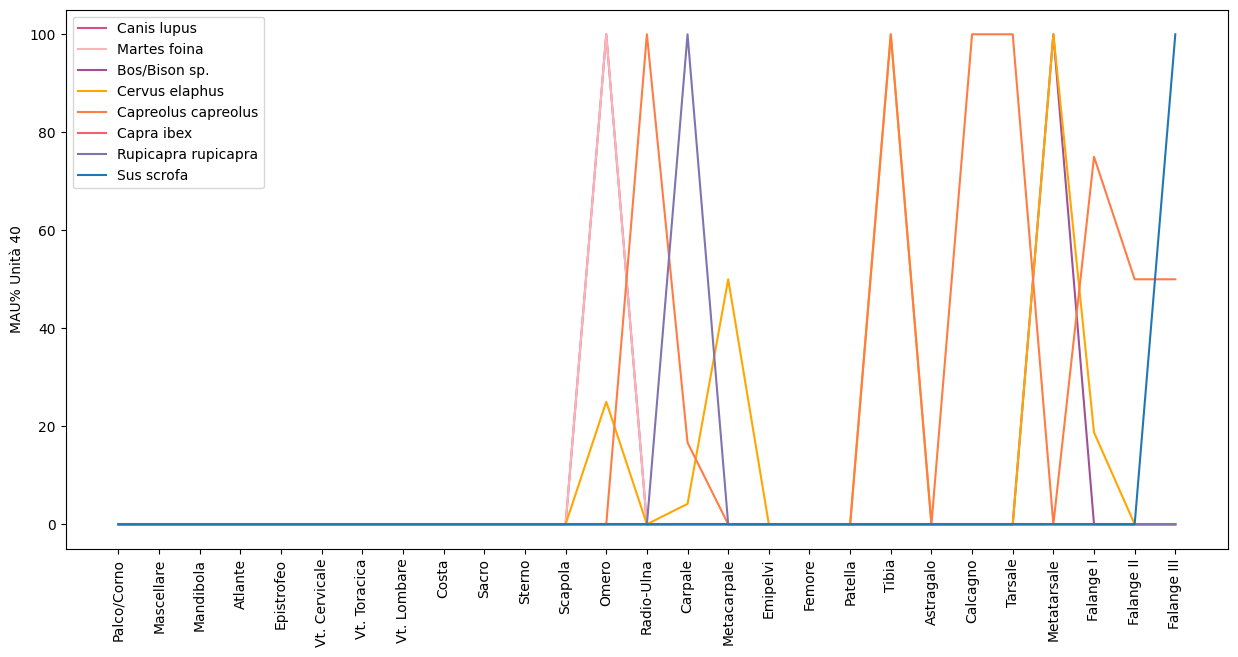

In [375]:
fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(7)

create_mau_lineplot(data_40_mau, ax1, '40')

plt.savefig("unita_40_mau.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Analisi per animale

In [376]:
data_40_mau_not_null = drop_animali_no_mau(data_40_mau)
data_40_mau_not_null['Animale'].unique().size

Prima del drop: 8


7

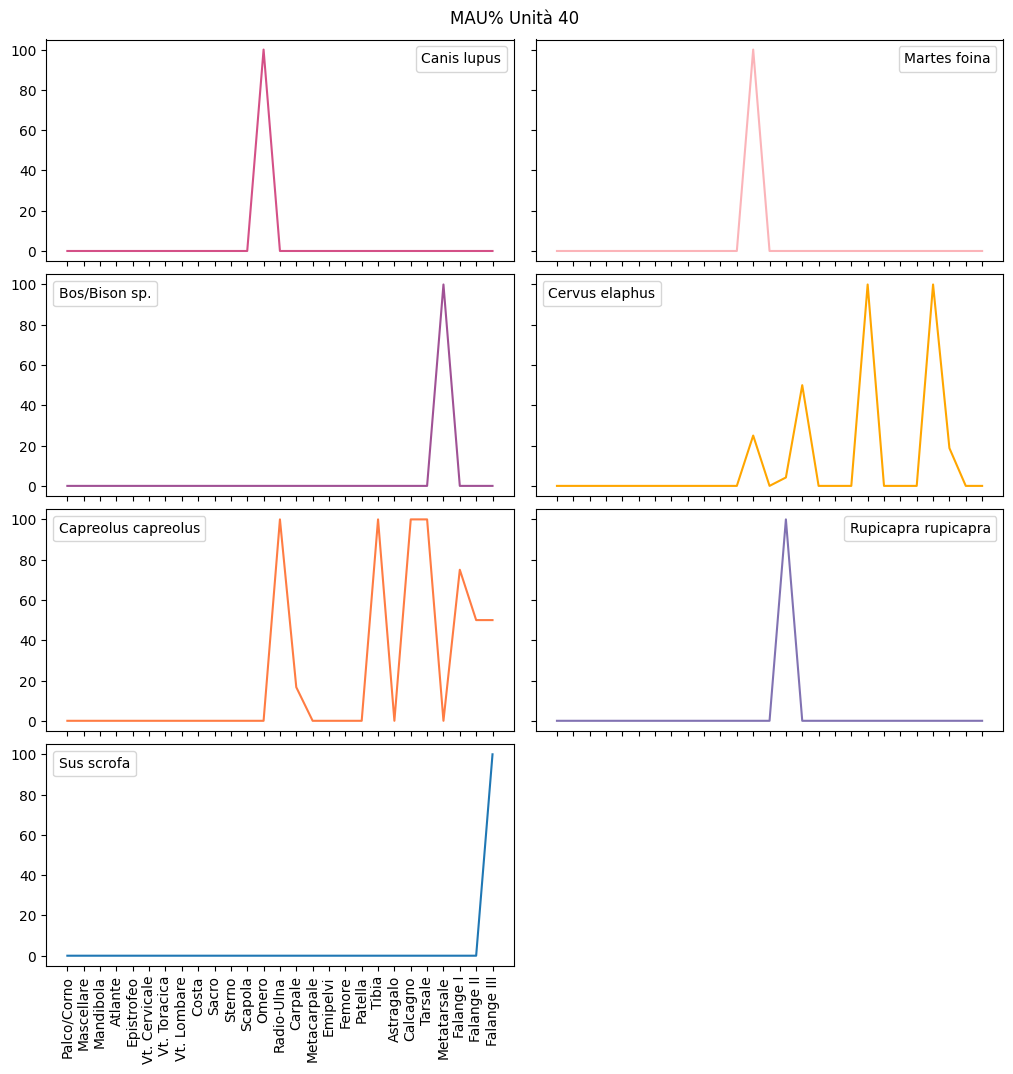

In [377]:
plot_all_animals(data_40_mau_not_null, 2, "40", "unita_40_animali")

##### Cervo e Capreolus

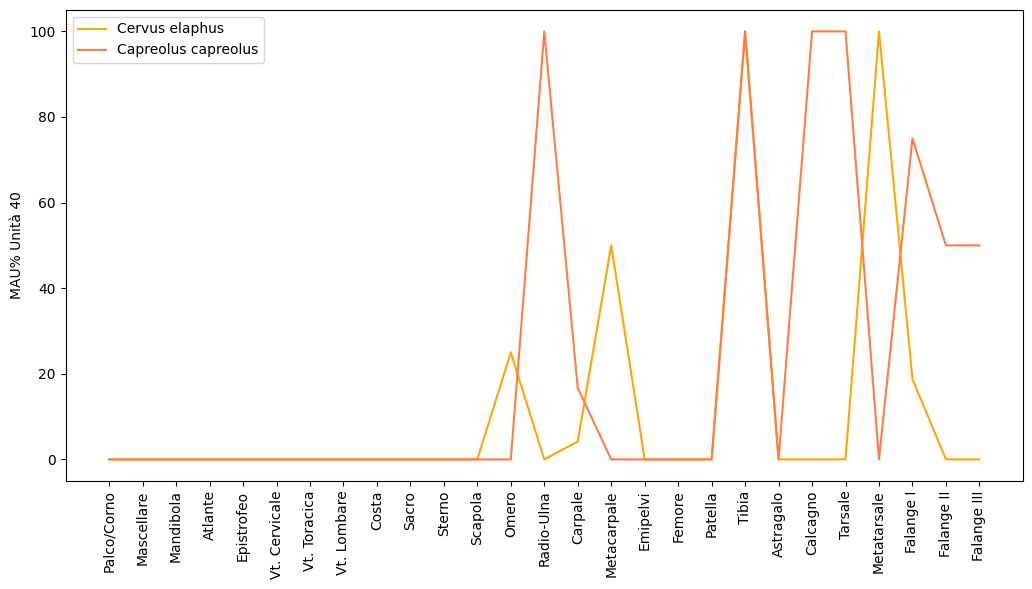

In [378]:
#Inizializza figura
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
fig.tight_layout(pad=0)

create_mau_lineplot(data_40_mau_not_null[data_40_mau_not_null['Animale'] == 'Cervus elaphus'], ax, '40')
create_mau_lineplot(data_40_mau_not_null[data_40_mau_not_null['Animale'] == 'Capreolus capreolus'], ax, '40')

plt.savefig("unita_40_mau_cervus_capr.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Unità 41

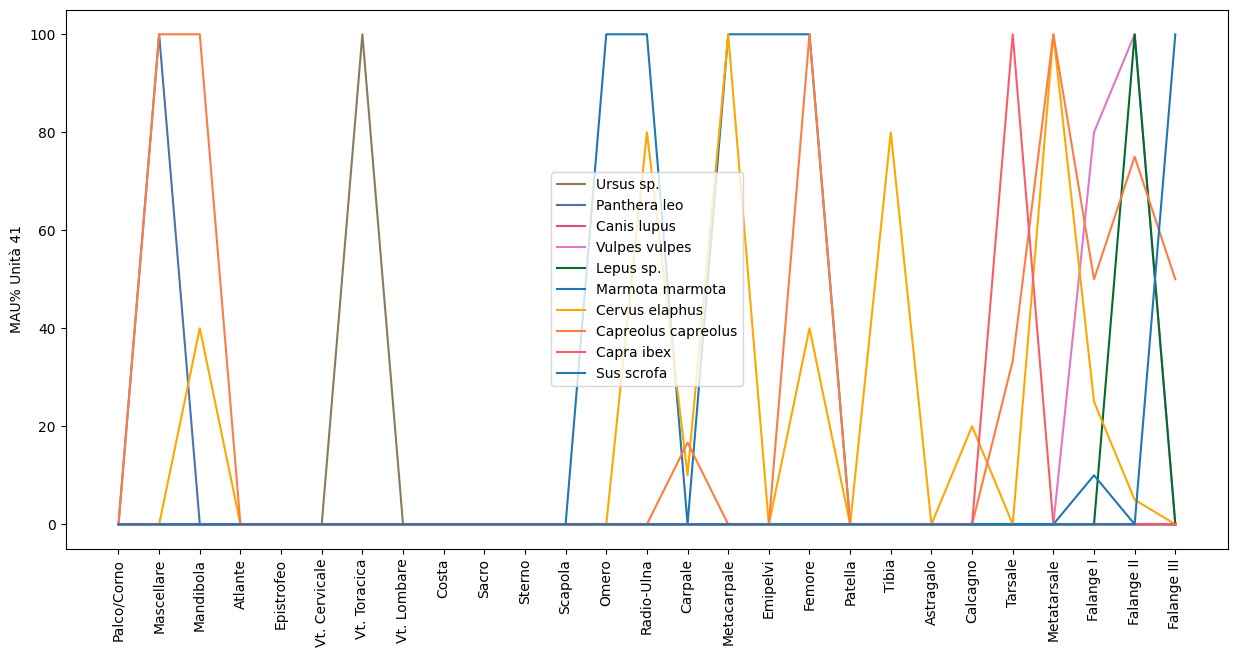

In [379]:
fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(7)

create_mau_lineplot(data_41_mau, ax1, '41')

plt.savefig("unita_41_mau.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Analisi per animale

In [380]:
data_41_mau_not_null = drop_animali_no_mau(data_41_mau)
data_41_mau_not_null['Animale'].unique().size

Prima del drop: 10


9

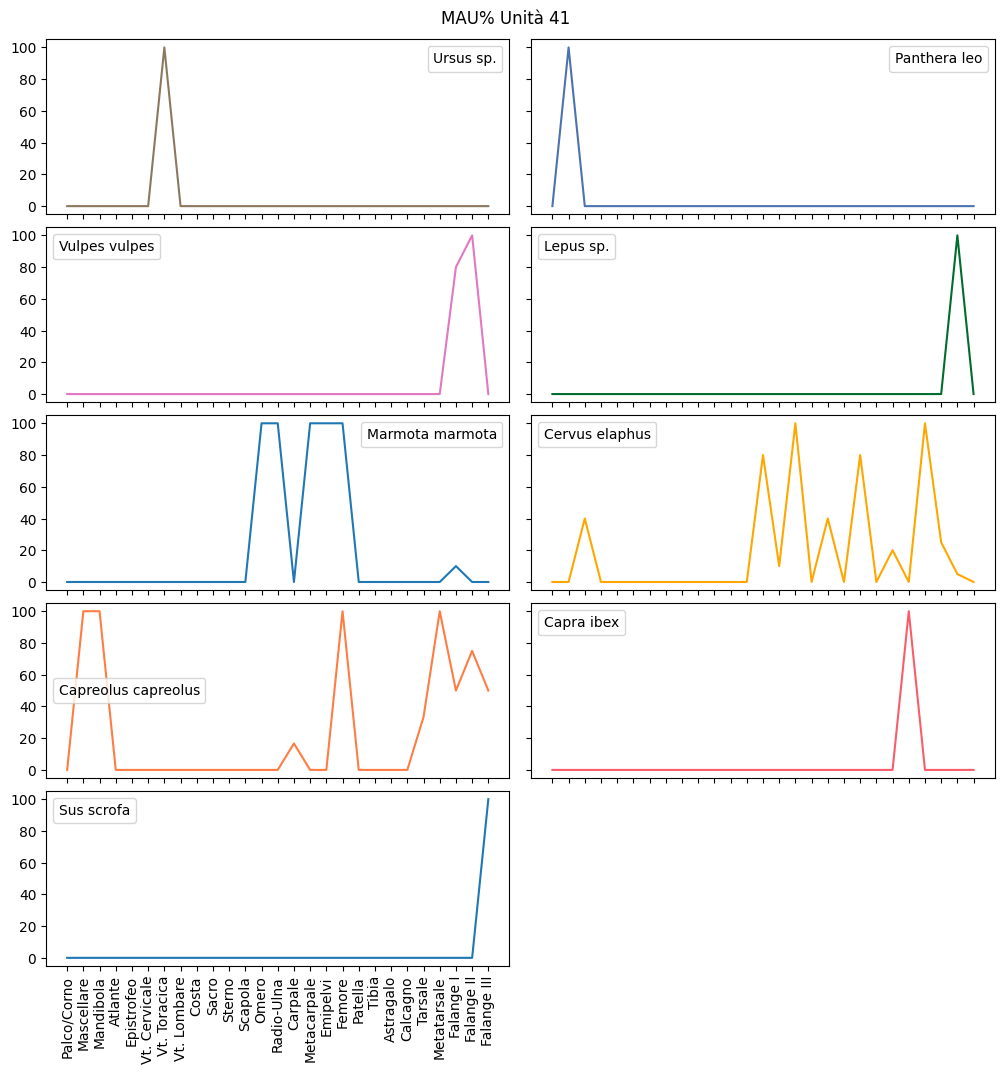

In [381]:
plot_all_animals(data_41_mau_not_null, 2, "41", "unita_41_animali")

##### Cervo e Capreolus

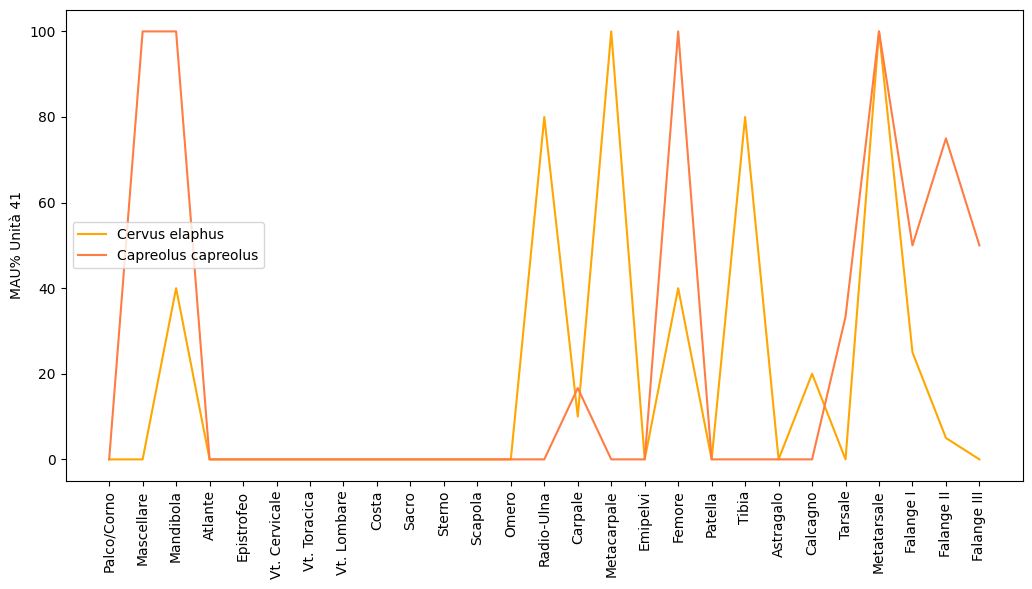

In [382]:
#Inizializza figura
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
fig.tight_layout(pad=0)

create_mau_lineplot(data_41_mau_not_null[data_41_mau_not_null['Animale'] == 'Cervus elaphus'], ax, '41')
create_mau_lineplot(data_41_mau_not_null[data_41_mau_not_null['Animale'] == 'Capreolus capreolus'], ax, '41')

plt.savefig("unita_41_mau_cervus_capr.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Unità 42

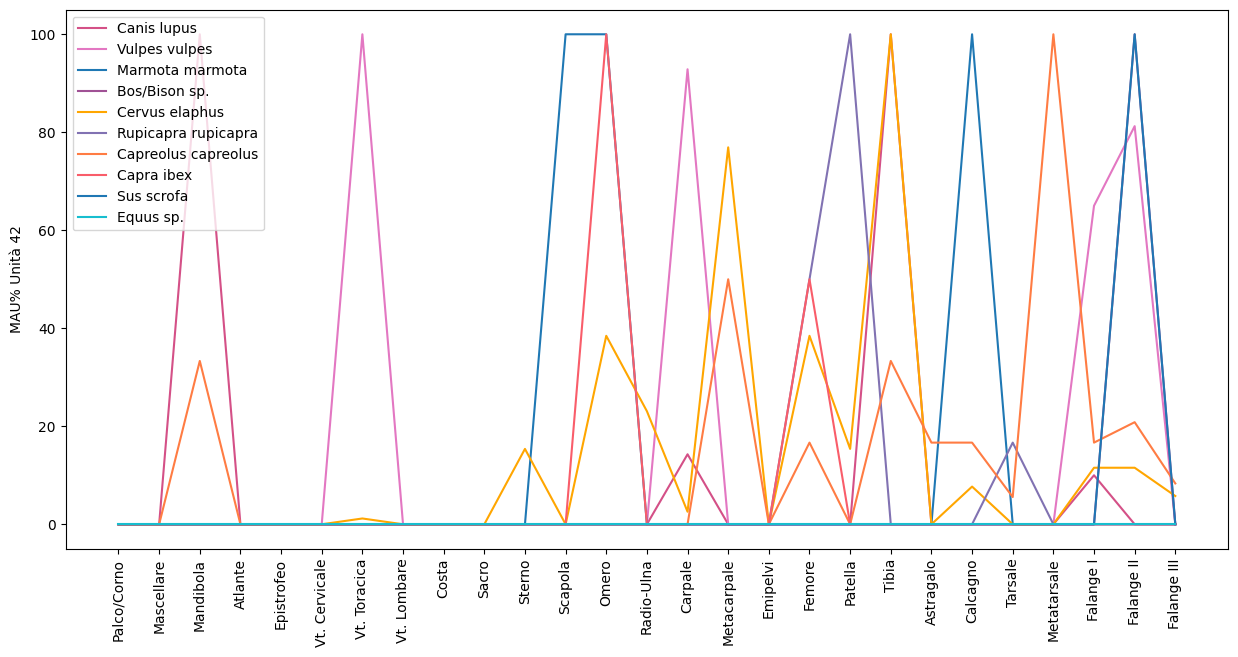

In [383]:
fig1, ax1 = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(7)

create_mau_lineplot(data_42_mau, ax1, '42')

plt.savefig("unita_42_mau.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Analisi per animale

In [384]:
data_42_mau_not_null = drop_animali_no_mau(data_42_mau)
data_42_mau_not_null['Animale'].unique().size

Prima del drop: 10


9

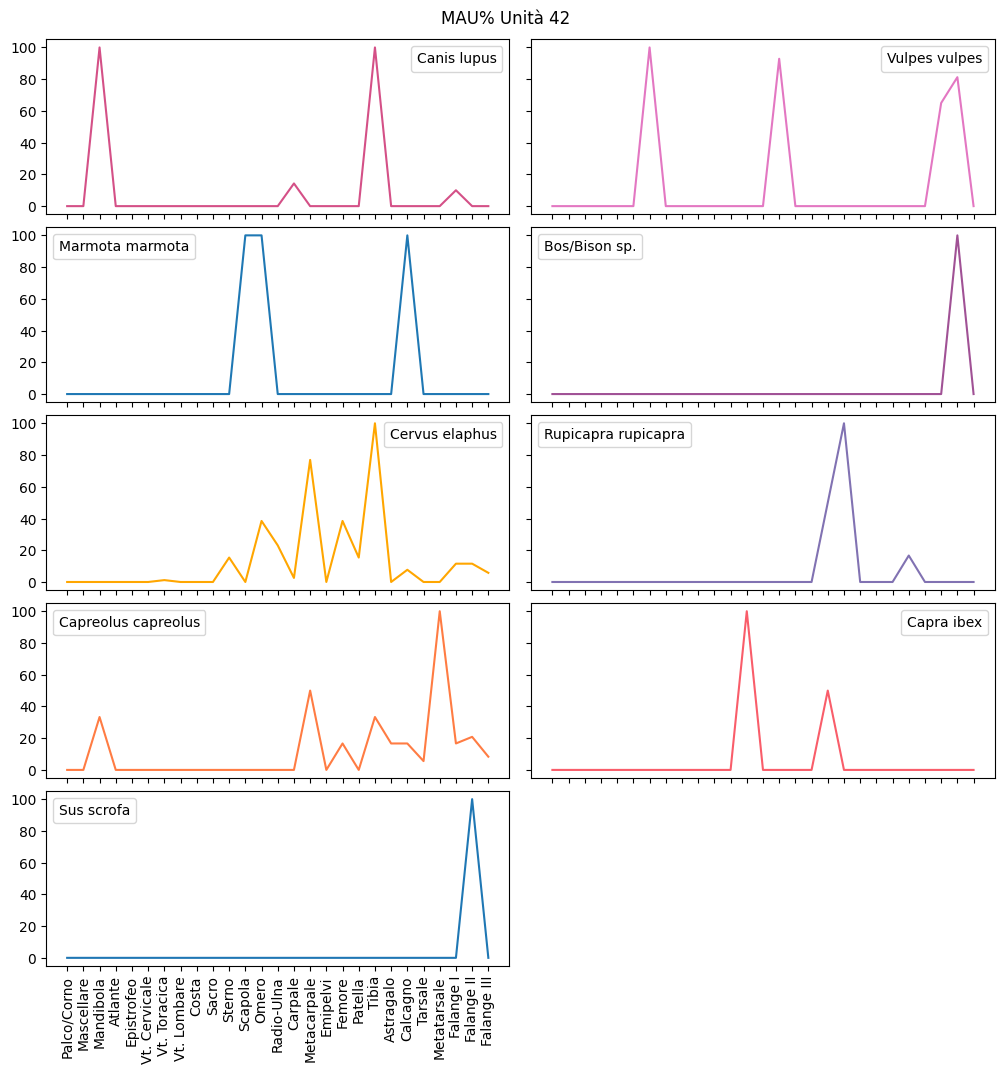

In [385]:
plot_all_animals(data_42_mau_not_null, 2, "42", "unita_42_animali")

##### Cervo e Capreolus

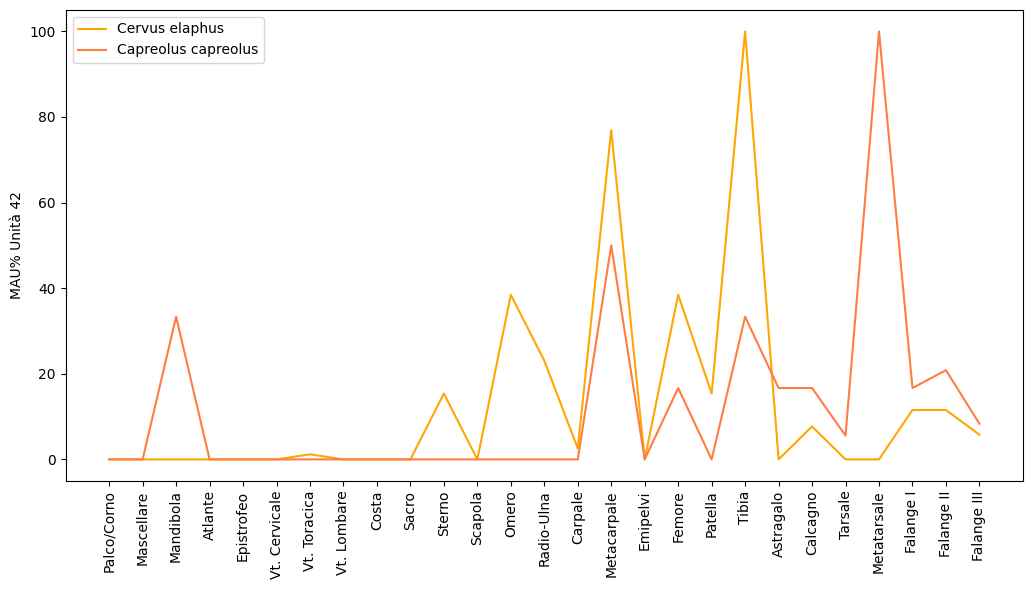

In [386]:
#Inizializza figura
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(5)
fig.tight_layout(pad=0)

create_mau_lineplot(data_42_mau_not_null[data_42_mau_not_null['Animale'] == 'Cervus elaphus'], ax, '42')
create_mau_lineplot(data_42_mau_not_null[data_42_mau_not_null['Animale'] == 'Capreolus capreolus'], ax, '42')

plt.savefig("unita_42_mau_cervus_capr.pdf", format="pdf", bbox_inches="tight")
plt.show()